# TNT hand gestures study

# flow of program
DELETE BEFORE SUBMISSION

-   code to import data from 3 csv files held in the data folder
-   data is then combined in a dictionary and then converted to a pandas dataframe
-   the data is then cleaned and the columns are renamed
-   the data is then split into a training and testing set
-   a linear regression model is then fitted to the training data
-   the model is then used to predict the test data
-   the mean squared error and r2 score are then calculated
-   the results are then printed to the console

**Dependencies**

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tensorflow

**Importing relevant libraries.**

In [ ]:

#-----------------Information-----------------#

'''
    Title: Linear Regression Model for Predicting Absolute Acceleration
    Data Collection Declaration:

    This project is being developed for a Data Science and Machine Learning class.
    The data used in this project was collected by the student developers at the University of Nottingham. 

    Legal Aspects:

    The data collection process complied with all applicable laws and university policies. 
    Any personal data that was collected has been anonymized to protect the privacy of the individuals involved. 

    Please note that the use of this data must comply with all relevant data protection and privacy laws. 
    Unauthorized use, disclosure, or duplication of this data is strictly prohibited.
'''
'''
    Data Information:

    Data within the dataset being examined is of the format of a csv file with the following columns:
    Column Names and Types:
    
    '''

#-----------------Information-----------------#

#-----------------Importing Libraries-----------------#

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
# import k-nearest neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

#-----------------Importing Libraries-----------------#

In [ ]:

#-----------------Flags-----------------#

SYS_MSG = True # Flag to toggle control over printing system messages to console 
PLOT = True # Flag to toggle control over plotting graphs
TEST_PLOT = False # Flag to toggle control over plotting test graphs

#-----------------Flags-----------------#

#-----------------Basic Functions-----------------#

# Function to print system messages
def print_sys_msg(msg):
    if SYS_MSG:
        print('-'*10+'System control message \n'+msg)

# Function to print normal messages
def print_msg(msg):
    print('-'*10+'Message \n'+msg)

#-----------------Basic Functions-----------------#

## Preperation Phase  
We create base classes to manage our data, visualisation, analysis, and prediction.  
Creating DataHandler class. It wwill manage the import, stored manipulation, and final storage of data.  
\- [member name]

In [21]:
#-----------------DataHandler Class-----------------#
'''
Class DataHandler
    purpose: import and manage data (data manipulation, data wrangling, and data preprocessing)

    initialization example:
        data = DataHandler()
    
    functions:
    - import_data: import data from csv files and combine them into a single dataframe
        dependencies used: pandas
        function call example: data.import_data(['data/member1.csv', 'data/member2.csv', 'data/member3.csv'])
        input: list of file names
        output: none
    
    - import_data_system: import data from the system
        dependencies used: pandas, os
        function call example: data.import_data_system(['data/member1', 'data/member2', 'data/member3'])
        input: list of directory names
        output: none
        
    - data_shape: print the shape of the dataframe
        dependencies used: pandas
        function call example: data.data_shape()
        input: none
        output: none

    - data_head: print the first 5 rows of the dataframe
        dependencies used: pandas
        function call example: data.data_head()
        input: none
        output: none

    - data_info: print the information of the dataframe
        dependencies used: pandas
        function call example: data.data_info()
        input: none
        output: none

    - data_describe: print the description of the dataframe
        dependencies used: pandas
        function call example: data.data_describe()
        input: none
        output: none

    - data_null: print the null values in the dataframe
        dependencies used: pandas
        function call example: data.data_null()
        input: none
        output: none
    
    - data_corr: print the correlation matrix of the dataframe
        dependencies used: pandas
        function call example: data.data_corr()
        input: none
        output: none

    - drop_duplicates: drop duplicates        
        dependencies used: pandas
        function call example: data.drop_duplicates()
        input: none
        output: none

    - drop_null: drop null values     
        dependencies used: pandas
        function call example: data.drop_null()
        input: none
        output: none
    
    - drop_outliers: drop outliers
        dependencies used: pandas
        function call example: data.drop_outliers()
        input: none
        output: none

    - drop_negative_time: drop negative time values
        dependencies used: pandas
        function call example: data.drop_negative_time()
        input: none
        output: none
        
- Managed by: Samarth
- Created on: 03/02/2024
- Modified on: 03/02/2024
- Contact:  psxs2@nottingham.ac.uk
'''
class DataHandler:
    number_of_files = 0
    data = None
    df = None

    def __init__(self):
        print_sys_msg('DataHandler:__init__: DataHandler object created')
    #-----------------Data Import Functions-----------------#
    
    # declaration example - data = DataHandler.import_data(['data/member1.csv', 'data/member2.csv', 'data/member3.csv'])
    def import_data(self, files):
            print_sys_msg('DataHandler:import_data: importing data from 3 csv files and combining them into a single dataframe')
            number_of_files = len(files)
            for i in range(number_of_files):
                if i == 0:
                    self.df = pd.read_csv(files[i])
                    self.data = {'data_'+str(i+1): pd.read_csv(files[i])}
                else:
                    self.df = pd.concat([self.df, pd.read_csv(files[i])], ignore_index=True)
                    self.data['data_'+str(i+1)] = pd.read_csv(files[i])
            print_sys_msg('DataHandler:import_data: data imported successfully')

    # declaration example - data = DataHandler.import_data_system(['data/member1/type_of_gesture/', 'data/member2/type_of_gesture/', 'data/member3/type_of_gesture/'])
    def import_data_system(self, directorys):
        print_sys_msg('DataHandler:import_data: importing data from the system')
        
        # all files are stored in the format data/member1/type_of_gesture/gesture1/Raw Data.csv

        # getting the number of members
        number_of_members = len(directorys)

        print_sys_msg('DataHandler:import_data: number of members: '+str(number_of_members))

        for i in range(number_of_members):
            # member name from the directory
            member = directorys[i].split('/')[1]
            # gesture name from the directory
            gesture = directorys[i].split('/')[2]
            # getting the number of gestures
            number_of_gestures = len(os.listdir(directorys[i]))

            print_sys_msg('DataHandler:import_data: member: '+member)
            print_sys_msg('DataHandler:import_data: gesture name: '+gesture)
            print_sys_msg('DataHandler:import_data: number of gestures: '+str(number_of_gestures))
            
            for j in range(number_of_gestures):
                # reading name of each gesture and then grabbing the 'Raw Data.csv' file from it
                gesture_name = os.listdir(directorys[i])[j]
                
                # reading the 'Raw Data.csv' file inside the gesture folder
                if self.data is None:
                    self.data = {'data_'+member+'_'+gesture+'_'+'_'+str(j+1): pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')}
                self.data['data_'+member+'_'+gesture+'_'+str(j+1)] = pd.read_csv(directorys[i]+gesture_name+'/Raw Data.csv')

                # adding gesture_name to the dictionary of data
                self.data['data_'+member+'_'+gesture+'_'+str(j+1)]['Gesture'] = gesture_name
        
        print_sys_msg('DataHandler:import_data: data imported successfully')
        # print the dictionary names 
        print_sys_msg('DataHandler:import_data: printing the dictionary names')
        print_sys_msg(str(self.data.keys()))
        

        
    #-----------------Data Import Functions-----------------#
                    
    
    #-----------------Basic Data Wrangling Functions-----------------#
    
    def data_shape(self):
        print_sys_msg('DataHandler:data_shape: printing the shape of the dataframe')
        print_sys_msg(str(self.df.shape))
    def data_head(self):
        print_sys_msg('DataHandler:data_head: printing the first 5 rows of the dataframe')
        print_sys_msg(str(self.df.head()))
    
    def data_info(self):
        print_sys_msg('DataHandler:data_info: printing the information of the dataframe')
        print_sys_msg(str(self.df.info()))
                      
    def data_describe(self):
        print_sys_msg('DataHandler:data_describe: printing the description of the dataframe')
        print_sys_msg(str(self.df.describe()))
                      
    def data_null(self):
        print_sys_msg('DataHandler:data_null: printing the null values in the dataframe')
        print_sys_msg(str(self.df.isnull().sum()))
                      
    def data_corr(self):
        print_sys_msg('DataHandler:data_corr: printing the correlation matrix of the dataframe')
        print_sys_msg(str(self.df.corr()))
    
    def data_missing(self):
        print_sys_msg('DataHandler:data_missing: printing the missing values in the dataframe')
        print_sys_msg(str(self.df.isna().any(axis=1)))
    #-----------------Basic Data Wrangling Functions-----------------#
        
    #-----------------Data Preprocessing Functions-----------------#

    # add_to_data: add data to the dataframe
    def add_to_data(self, data):
        print_sys_msg('DataHandler:add_to_data: adding data to the dataframe')
        self.df = pd.concat([self.df, data], ignore_index=True)

    def drop_duplicates(self):
        print_sys_msg('DataHandler:drop_duplicates: dropping duplicates')
        self.df = self.df.drop_duplicates()
    
    def drop_null(self):
        print_sys_msg('DataHandler:drop_null: dropping null values')
        self.df = self.df.dropna()


    # def drop_outliers(self):
    #     print_sys_msg('DataHandler:drop_outliers: dropping outliers'
    #     self.df = self.df[(self.df['Linear Acceleration x (m/s^2)'] > -10) & (self.df['Linear Acceleration x (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration y (m/s^2)'] > -10) & (self.df['Linear Acceleration y (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Linear Acceleration z (m/s^2)'] > -10) & (self.df['Linear Acceleration z (m/s^2)'] < 10)]
    #     self.df = self.df[(self.df['Absolute acceleration (m/s^2)'] > 0) & (self.df['Absolute acceleration (m/s^2)'] < 10)]

    def drop_negative_time(self):
        print_sys_msg('DataHandler:drop_negative_time: dropping negative time values')
        self.df = self.df[self.df['Time (s)'] > 0]

    # missing values handling - drop rows with missing values
    def drop_missing(self, threshold=3):
        print_sys_msg('DataHandler:drop_missing: dropping missing values')
        self.df = self.df.dropna(thresh=threshold).copy()

    # missing values handling - fill missing values with mean of the column
    def fill_missing(self):
        print_sys_msg('DataHandler:fill_missing: filling missing values with mean of the column')
        self.df = self.df.fillna(self.df.mean())

    # missing values handling - fill missing values with median of the column
    def fill_missing_median(self):
        print_sys_msg('DataHandler:fill_missing_median: filling missing values with median of the column')
        self.df = self.df.fillna(self.df.median())
    
    # missing values handling - fill missing values with mode of the column
    def fill_missing_mode(self):
        print_sys_msg('DataHandler:fill_missing_mode: filling missing values with mode of the column')
        self.df = self.df.fillna(self.df.mode().iloc[0])
    
    # missing values handling - fill missing values with bill debth of the column
    #-----------------------------------
    #-----------------------------------To be written
    #-----------------------------------
    
    # data normalization - min-max normalization
    def min_max_normalization(self):
        print_sys_msg('DataHandler:min_max_normalization: min-max normalization')
        self.df = (self.df - self.df.min()) / (self.df.max() - self.df.min())
    
    # data normalization - standardization
    def standardization(self):
        print_sys_msg('DataHandler:standardization: standardization')
        self.df = (self.df - self.df.mean()) / self.df.std()
    

    #-----------------Data Preprocessing Functions-----------------#


    #-----------------Data Splitting Functions-----------------#
    
    #-----------------Data Splitting Functions-----------------#
        
    #-----------------Storing Data Functions-----------------#

    def store_data_with_name(self, file_name):
        print_sys_msg('DataHandler:store_data: storing data to a csv file')
        self.df.to_csv(file_name, index=False)
    
    def store_data_with_current_date_time(self):
        print_sys_msg('DataHandler:store_data_with_current_date_time: storing data to a csv file with current date and time')
        self.df.to_csv('data_'+str(pd.to_datetime('today'))+'.csv', index=False)
    
    def store_data_with_index(self):
        print_sys_msg('DataHandler:store_data_with_index: storing data to a csv file with index')
        
        # data is stored with index only
        # getting the highest index of the data in the data folder and then incrementing it by 1
        # storing the data with the new index
        #-----------------------------------
        #-----------------------------------To be written

    #-----------------Storing Data Functions-----------------#

#-----------------DataHandler Class-----------------#

Next we make a basic visualization class that will manage the plotting and core visualization functions.

In [ ]:
#-----------------DataVisualization Class-----------------#
'''
Class DataVisualization

    purpose: visualize data (data visualization)
    charts included: line, scatter, bar, histogram, box plot, violin plot, bullet, table, sparkline, connected scatter plot, box, pie, doughnut, gauge, waffle
    
    functions:
    -   plt_create_linear_sub_plots: create linear sub plots
        dependencies used: matplotlib
        function call example: DataVisualization(DataHandler).plt_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
        input: arrangement type (arrangment), list of plots (plot_list)
        output: none

    -   plt_create_grid_sub_plots: create grid sub plots
        dependencies used: matplotlib, math
        function call example: DataVisualization(DataHandler).plt_create_grid_sub_plots([['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
        input: list of plots (plot_list)
        output: none

    -   sns_create_linear_sub_plots: create linear sub plots
        dependencies used: seaborn
        function call example: DataVisualization(DataHandler).sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
        input: arrangement type (arrangment), list of plots (plot_list)
        output: none

    -   sns_create_grid_sub_plots: create grid sub plots
        dependencies used: seaborn, math
        function call example: DataVisualization(DataHandler).sns_create_grid_sub_plots([['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
        input: list of plots (plot_list)
        output: none
    
- Managed by: 
- Created on: 03/02/2024
- Modified on: 03/02/2024
- Contact: @nottingham.ac.uk
'''

class DataVisualization:
    DataHandler = None
    def __init__(self, DataHandler):
        self.DataHandler = DataHandler
    
    #-----------------matplot based Base Data Visualization Functions-----------------#

    # declaration example - DataVisualization(DataHandler).simple_plot([1, 2, 3, 4, 5], [1, 4, 9, 16, 25], 'Time (s)', 'Absolute acceleration (m/s^2)', 'Time vs Absolute acceleration')
    def simple_plot(self, x, y, x_label, y_label, title):
        plt.plot(x, y)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()

    # declaration example - DataVisualization(DataHandler).create_sub_plots('left_to_right', [['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']])
    def plt_create_linear_sub_plots(self, arrangment ,plot_list, figsize_x, figsize_y, name):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')
        number_of_plots = len(plot_list)
        
        if arrangment == 'left_to_right':
            fig, ax = plt.subplots(1, number_of_plots, figsize=(figsize_x, figsize_y))
        elif arrangment == 'top_to_bottom':
            fig, ax = plt.subplots(number_of_plots, 1, figsize=(figsize_x, figsize_y))  
        else:
            print_sys_msg('DataVisualization:create_base_plots: invalid arrangement type') 
            return    
        
        for i in range(number_of_plots):
            if len(plot_list[i]) >= 3:
                # plotting line graph
                if plot_list[i][0] == 'line':
                    ax[i].plot(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                # plotting scatter graph
                elif plot_list[i][0] == 'scatter':
                    ax[i].scatter(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                # plotting bar graph
                elif plot_list[i][0] == 'bar':
                    ax[i].bar(self.DataHandler.df[plot_list[i][1]], self.DataHandler.df[plot_list[i][2]])
                # plotting histogram
                elif plot_list[i][0] == 'hist':
                    ax[i].hist(self.DataHandler.df[plot_list[i][1]], bins=10)
                # plotting box plot
                elif plot_list[i][0] == 'box':
                    ax[i].boxplot(self.DataHandler.df[plot_list[i][1]])
                # plotting violin plot
                elif plot_list[i][0] == 'violin':
                    ax[i].violinplot(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'bullet':
                    ax[i].bullet(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'table':
                    ax[i].table(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'sparkline':
                    ax[i].sparkline(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'connected scatter plot':
                    ax[i].connectedscatterplot(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'pie':
                    ax[i].pie(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'doughnut':
                    ax[i].doughnut(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'gauge':
                    ax[i].gauge(self.DataHandler.df[plot_list[i][1]])
                elif plot_list[i][0] == 'waffle':
                    ax[i].waffle(self.DataHandler.df[plot_list[i][1]])
                # invalid plot type
                else:
                    print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                
                ax[i].set_xlabel(plot_list[i][1])
                ax[i].set_ylabel(plot_list[i][2])
                ax[i].set_title(plot_list[i][1]+' vs '+plot_list[i][2]+' - '+name)

                                                                                
        plt.show()
    
    def plt_create_grid_sub_plots(self, plot_list, figsize_x, figsize_y, name):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')

        number_of_plots = len(plot_list)
        print_sys_msg('DataVisualization:create_base_plots: number_of_plots: '+str(number_of_plots))
        temp = math.ceil(math.sqrt(number_of_plots))
        print_sys_msg('DataVisualization:create_base_plots: temp: '+str(temp))
        fig, ax = plt.subplots(temp, temp, figsize=(figsize_x, figsize_y))

        for i in range(temp):
            for j in range(temp):
                if (i*temp+j) < number_of_plots:
                    if len(plot_list[i*temp+j]) >= 3:
                        # plotting line graph
                        if plot_list[i*temp+j][0] == 'line':
                            ax[i, j].plot(self.DataHandler.df[plot_list[i*temp+j][1]], self.DataHandler.df[plot_list[i*temp+j][2]])
                        # plotting scatter graph
                        elif plot_list[i*temp+j][0] == 'scatter':
                            ax[i, j].scatter(self.DataHandler.df[plot_list[i*temp+j][1]], self.DataHandler.df[plot_list[i*temp+j][2]])
                        # plotting bar graph
                        elif plot_list[i*temp+j][0] == 'bar':
                            ax[i, j].bar(self.DataHandler.df[plot_list[i*temp+j][1]], self.DataHandler.df[plot_list[i*temp+j][2]])
                        # plotting histogram
                        elif plot_list[i*temp+j][0] == 'hist':
                            ax[i, j].hist(self.DataHandler.df[plot_list[i*temp+j][1]], bins=10)
                        # plotting box plot
                        elif plot_list[i*temp+j][0] == 'box':
                            ax[i, j].boxplot(self.DataHandler.df[plot_list[i*temp+j][1]])
                        # plotting violin plot
                        elif plot_list[i*temp+j][0] == 'violin':
                            ax[i, j].violinplot(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'bullet':
                            ax[i, j].bullet(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'table':
                            ax[i, j].table(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'sparkline':
                            ax[i, j].sparkline(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'connected scatter plot':
                            ax[i, j].connectedscatterplot(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'pie':
                            ax[i, j].pie(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'doughnut':
                            ax[i, j].doughnut(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'gauge':
                            ax[i, j].gauge(self.DataHandler.df[plot_list[i*temp+j][1]])
                        elif plot_list[i*temp+j][0] == 'waffle':
                            ax[i, j].waffle(self.DataHandler.df[plot_list[i*temp+j][1]])
                        # invalid plot type
                        else:
                            print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                        ax[i, j].set_xlabel(plot_list[i*temp+j][1])
                        ax[i, j].set_ylabel(plot_list[i*temp+j][2])
                        ax[i, j].set_title(plot_list[i*temp+j][1]+' vs '+plot_list[i*temp+j][2]+' - '+name)
                                                                                        
        plt.show()

    #-----------------matplot based Base Data Visualization Functions-----------------#
    
    #-----------------seaborn based Base Data Visualization Functions-----------------#
    
    def simple_sns_plot(self, x, y, x_label, y_label, title):
        sns.lineplot(x=x, y=y, data=self.DataHandler.df)
        plt.xlabel(x_label)
        plt.ylabel(y_label)
        plt.title(title)
        plt.show()
    
    def sns_create_linear_sub_plots(self, arrangment ,plot_list, figsize_x, figsize_y, name):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')
        number_of_plots = len(plot_list)

        if arrangment == 'left_to_right':
            fig, ax = plt.subplots(1, number_of_plots, figsize=(figsize_x, figsize_y))
        elif arrangment == 'top_to_bottom':
            fig, ax = plt.subplots(number_of_plots, 1, figsize=(figsize_x, figsize_y))  
        else:
            print_sys_msg('DataVisualization:create_base_plots: invalid arrangement type') 
            return    
        
        for i in range(number_of_plots):
            if len(plot_list[i]) >= 3:
                # plotting line graph
                if plot_list[i][0] == 'line':
                    sns.lineplot(x=plot_list[i][1], y=plot_list[i][2], data=self.DataHandler.df, ax=ax[i])
                # plotting scatter graph
                elif plot_list[i][0] == 'scatter':
                    sns.scatterplot(x=plot_list[i][1], y=plot_list[i][2], data=self.DataHandler.df, ax=ax[i])
                # plotting bar graph
                elif plot_list[i][0] == 'bar':
                    sns.barplot(x=plot_list[i][1], y=plot_list[i][2], data=self.DataHandler.df, ax=ax[i])
                # plotting histogram
                elif plot_list[i][0] == 'hist':
                    sns.histplot(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting box plot
                elif plot_list[i][0] == 'box':
                    sns.boxplot(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting violin plot
                elif plot_list[i][0] == 'violin':
                    sns.violinplot(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting bullet plot
                elif plot_list[i][0] == 'bullet':
                    sns.bullet(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting table plot
                elif plot_list[i][0] == 'table':
                    sns.table(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting sparkline plot
                elif plot_list[i][0] == 'sparkline':
                    sns.sparkline(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting connected scatter plot
                elif plot_list[i][0] == 'connected scatter plot':
                    sns.connectedscatterplot(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting pie plot
                elif plot_list[i][0] == 'pie':
                    sns.pie(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting doughnut plot
                elif plot_list[i][0] == 'doughnut':
                    sns.doughnut(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting gauge plot
                elif plot_list[i][0] == 'gauge':
                    sns.gauge(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # plotting waffle plot
                elif plot_list[i][0] == 'waffle':
                    sns.waffle(x=plot_list[i][1], data=self.DataHandler.df, ax=ax[i])
                # invalid plot type
                else:
                    print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                
                ax[i].set_xlabel(plot_list[i][1])
                ax[i].set_ylabel(plot_list[i][2])
                ax[i].set_title(plot_list[i][1]+' vs '+plot_list[i][2]+' - '+name)
                                                                                
        plt.show()
    
    def sns_create_grid_sub_plots(self, plot_list, figsize_x, figsize_y, name):
        print_sys_msg('DataVisualization:create_base_plots: creating base plots')

        number_of_plots = len(plot_list)
        print_sys_msg('DataVisualization:create_base_plots: number_of_plots: '+str(number_of_plots))
        temp = math.ceil(math.sqrt(number_of_plots))
        print_sys_msg('DataVisualization:create_base_plots: temp: '+str(temp))
        fig, ax = plt.subplots(temp, temp, figsize=(figsize_x, figsize_y))

        for i in range(temp):
            for j in range(temp):
                if (i*temp+j) < number_of_plots:
                    if len(plot_list[i*temp+j]) >= 3:
                        # plotting line graph
                        if plot_list[i*temp+j][0] == 'line':
                            sns.lineplot(x=plot_list[i*temp+j][1], y=plot_list[i*temp+j][2], data=self.DataHandler.df, ax=ax[i, j])
                        # plotting scatter graph
                        elif plot_list[i*temp+j][0] == 'scatter':
                            sns.scatterplot(x=plot_list[i*temp+j][1], y=plot_list[i*temp+j][2], data=self.DataHandler.df, ax=ax[i, j])
                        # plotting bar graph
                        elif plot_list[i*temp+j][0] == 'bar':
                            sns.barplot(x=plot_list[i*temp+j][1], y=plot_list[i*temp+j][2], data=self.DataHandler.df, ax=ax[i, j])
                        # plotting histogram
                        elif plot_list[i*temp+j][0] == 'hist':
                            sns.histplot(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        # plotting box plot
                        elif plot_list[i*temp+j][0] == 'box':
                            sns.boxplot(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        # plotting violin plot
                        elif plot_list[i*temp+j][0] == 'violin':
                            sns.violinplot(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'bullet':
                            sns.bullet(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'table':
                            sns.table(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'sparkline':
                            sns.sparkline(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'connected scatter plot':
                            sns.connectedscatterplot(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'pie':
                            sns.pie(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'doughnut':
                            sns.doughnut(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'gauge':
                            sns.gauge(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        elif plot_list[i*temp+j][0] == 'waffle':
                            sns.waffle(x=plot_list[i*temp+j][1], data=self.DataHandler.df, ax=ax[i, j])
                        # invalid plot type
                        else:
                            print_sys_msg('DataVisualization:create_base_plots: invalid plot type')
                        ax[i, j].set_xlabel(plot_list[i*temp+j][1])
                        ax[i, j].set_ylabel(plot_list[i*temp+j][2])
                        ax[i, j].set_title(plot_list[i*temp+j][1]+' vs '+plot_list[i*temp+j][2]+' - '+name)

        plt.show()

## DATA Initiation Phase  

### Data import  
importing 3 seperate files containing the data from phyphox of each member of the team

In [22]:
data = DataHandler()
data.import_data_system(['data/anakha/circles/', 'data/anakha/come here/', 'data/anakha/go away/', 'data/anakha/wave/'])

----------System control message 
DataHandler:__init__: DataHandler object created
----------System control message 
DataHandler:import_data: importing data from the system
----------System control message 
DataHandler:import_data: number of members: 4
----------System control message 
DataHandler:import_data: member: anakha
----------System control message 
DataHandler:import_data: gesture name: circles
----------System control message 
DataHandler:import_data: number of gestures: 10
----------System control message 
DataHandler:import_data: member: anakha
----------System control message 
DataHandler:import_data: gesture name: come here
----------System control message 
DataHandler:import_data: number of gestures: 10
----------System control message 
DataHandler:import_data: member: anakha
----------System control message 
DataHandler:import_data: gesture name: go away
----------System control message 
DataHandler:import_data: number of gestures: 10
----------System control message 


----------System control message 
displaying -> data_anakha_circles_1 -- Anticlockwise flat
----------System control message 
DataVisualization:create_base_plots: creating base plots


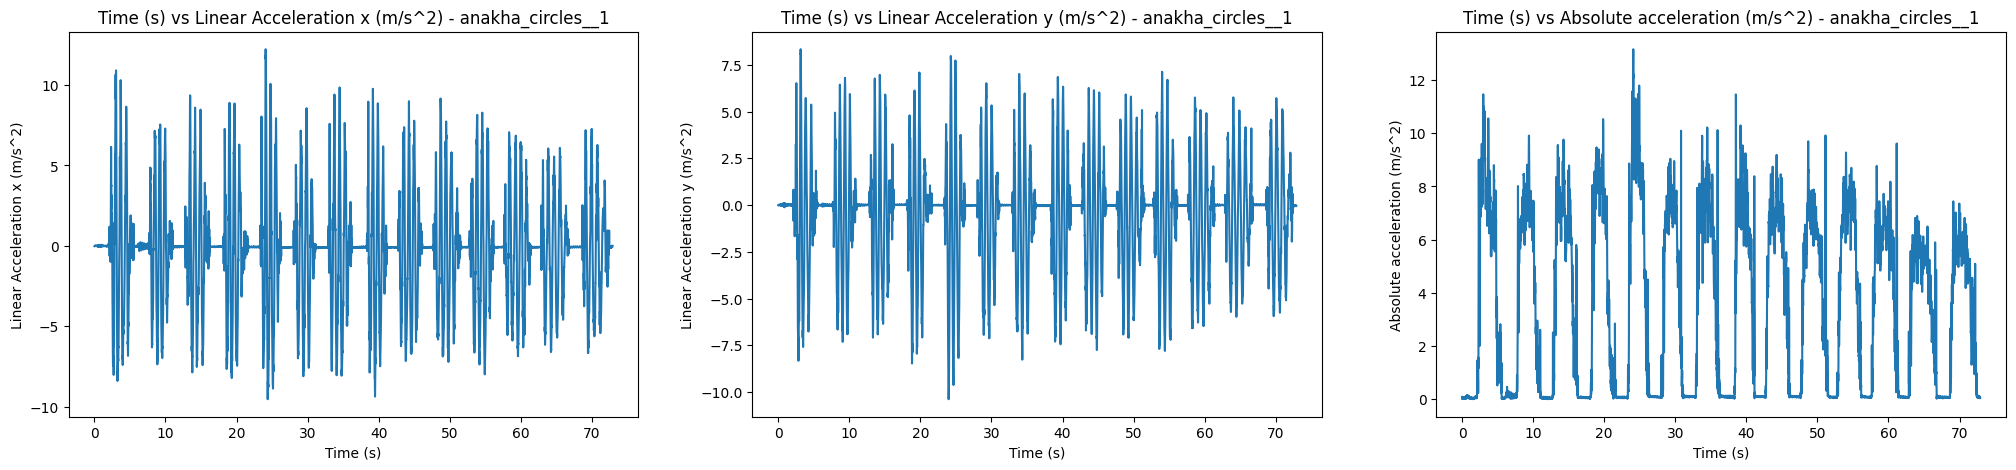

----------System control message 
displaying -> data_anakha_circles_2 -- Anticlockwise low diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


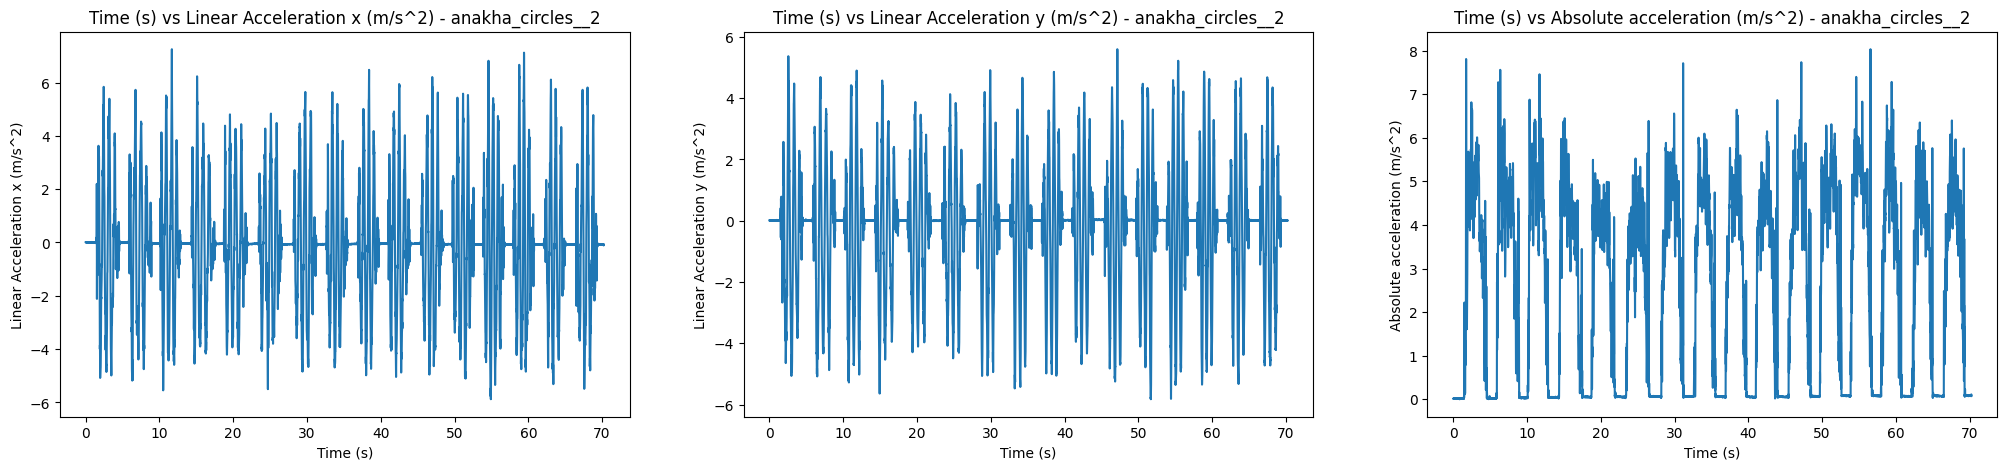

----------System control message 
displaying -> data_anakha_circles_3 -- Anticlockwise mid diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


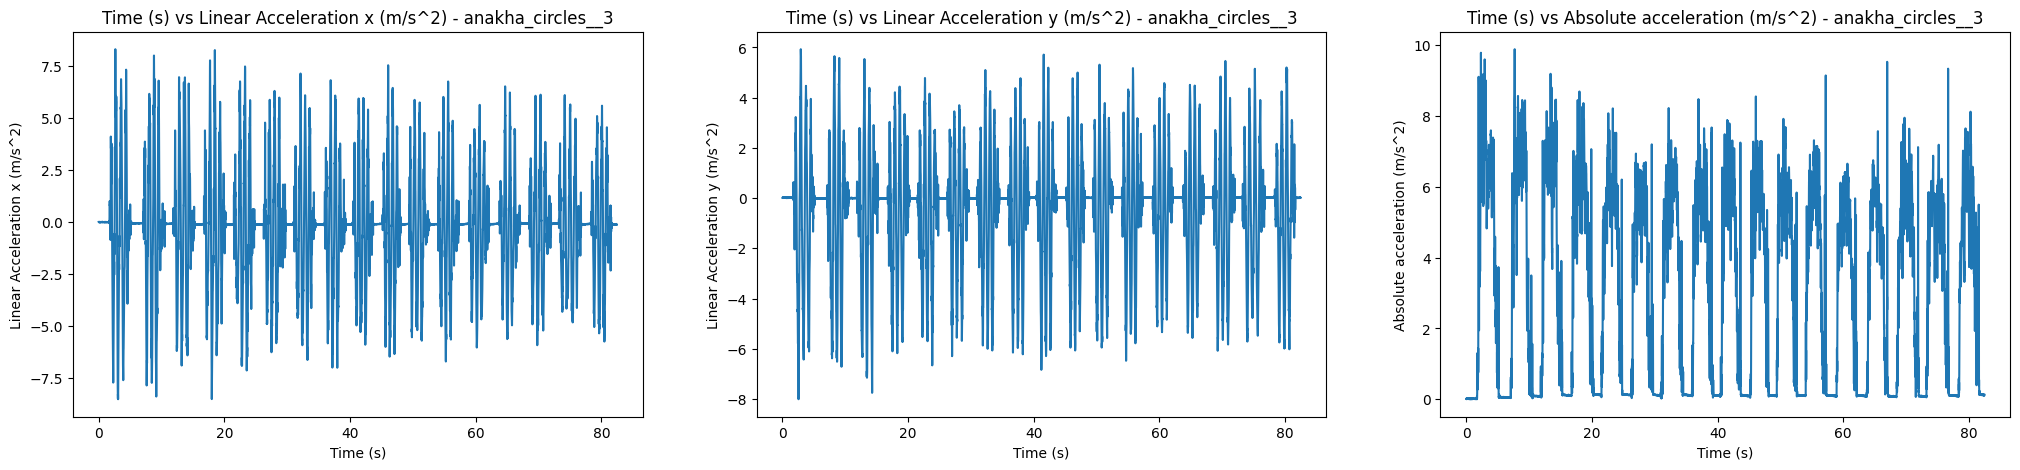

----------System control message 
displaying -> data_anakha_circles_4 -- Anticlockwise steep diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


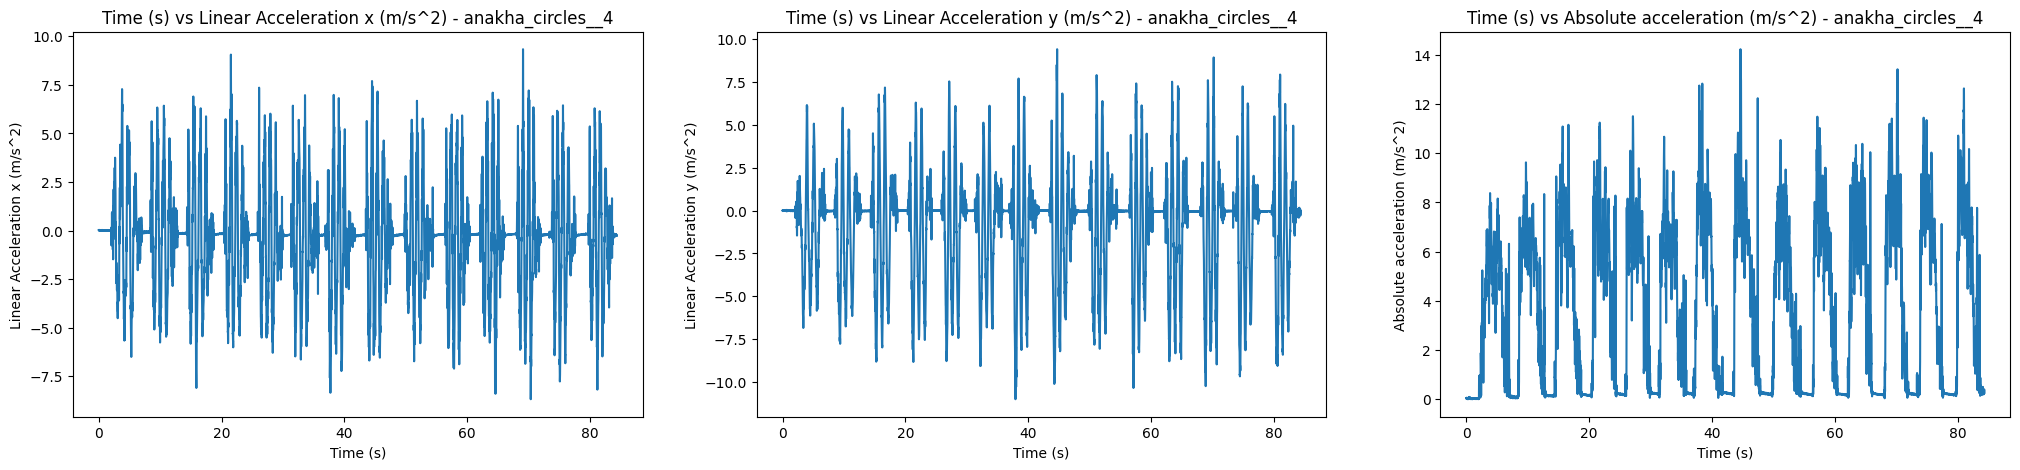

----------System control message 
displaying -> data_anakha_circles_5 -- Anticlockwise vertical
----------System control message 
DataVisualization:create_base_plots: creating base plots


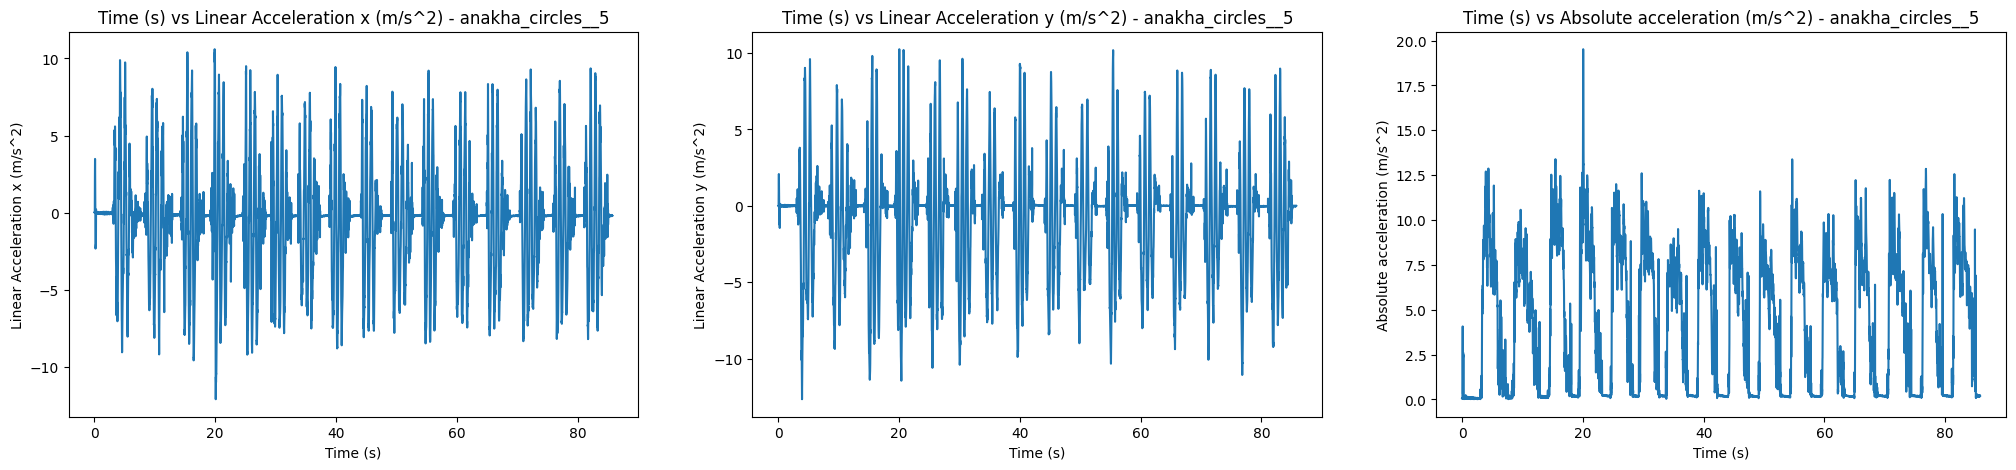

----------System control message 
displaying -> data_anakha_circles_6 -- Clockwise flat
----------System control message 
DataVisualization:create_base_plots: creating base plots


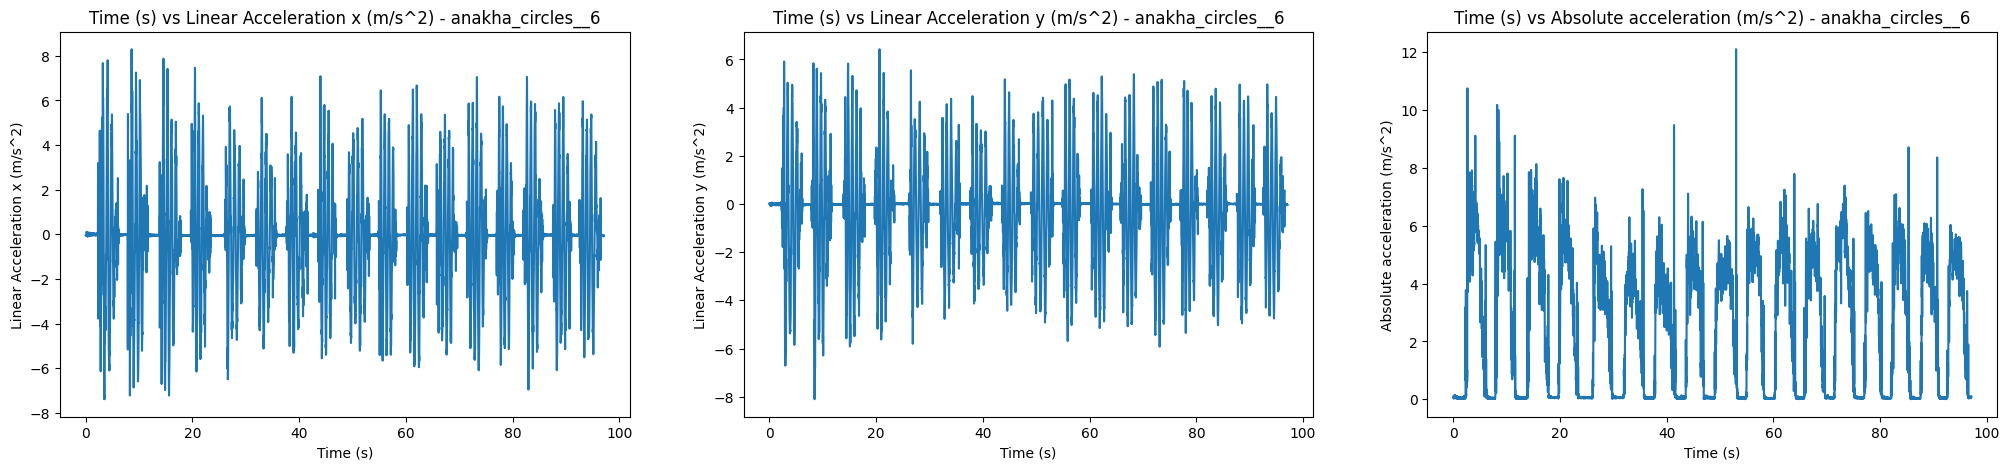

----------System control message 
displaying -> data_anakha_circles_7 -- Clockwise low diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


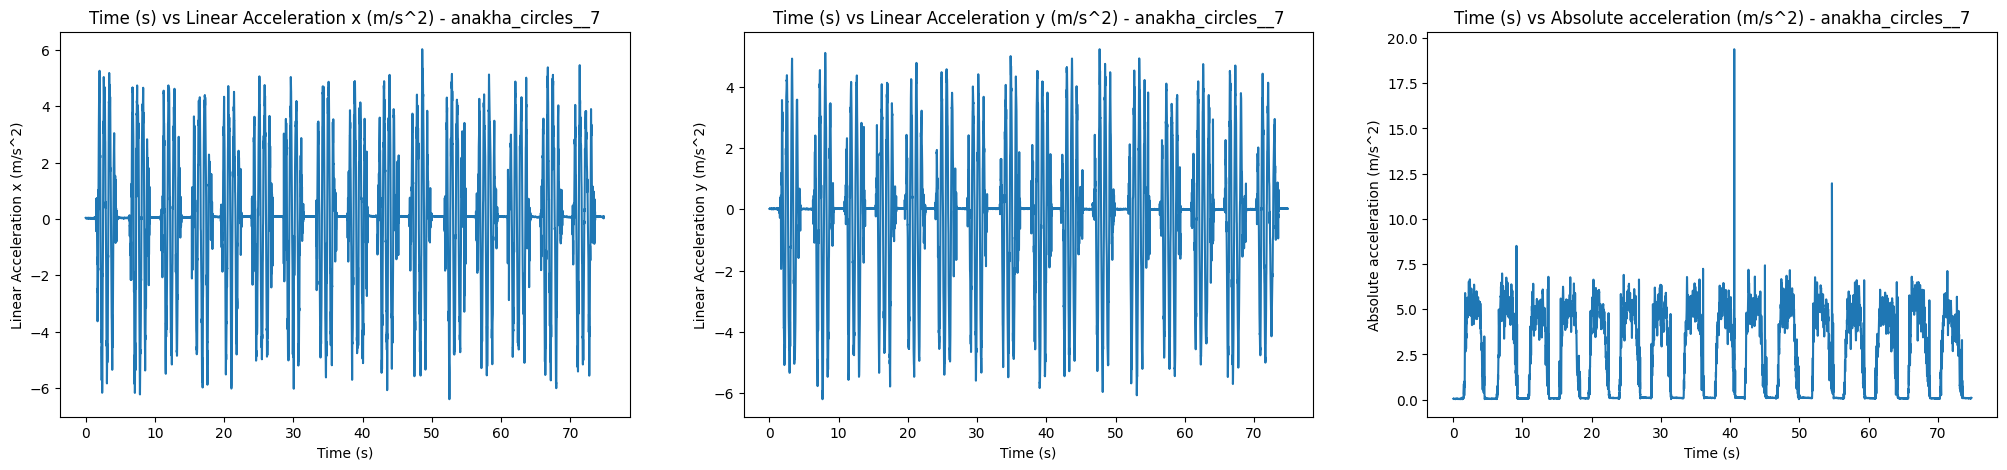

----------System control message 
displaying -> data_anakha_circles_8 -- Clockwise mid diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


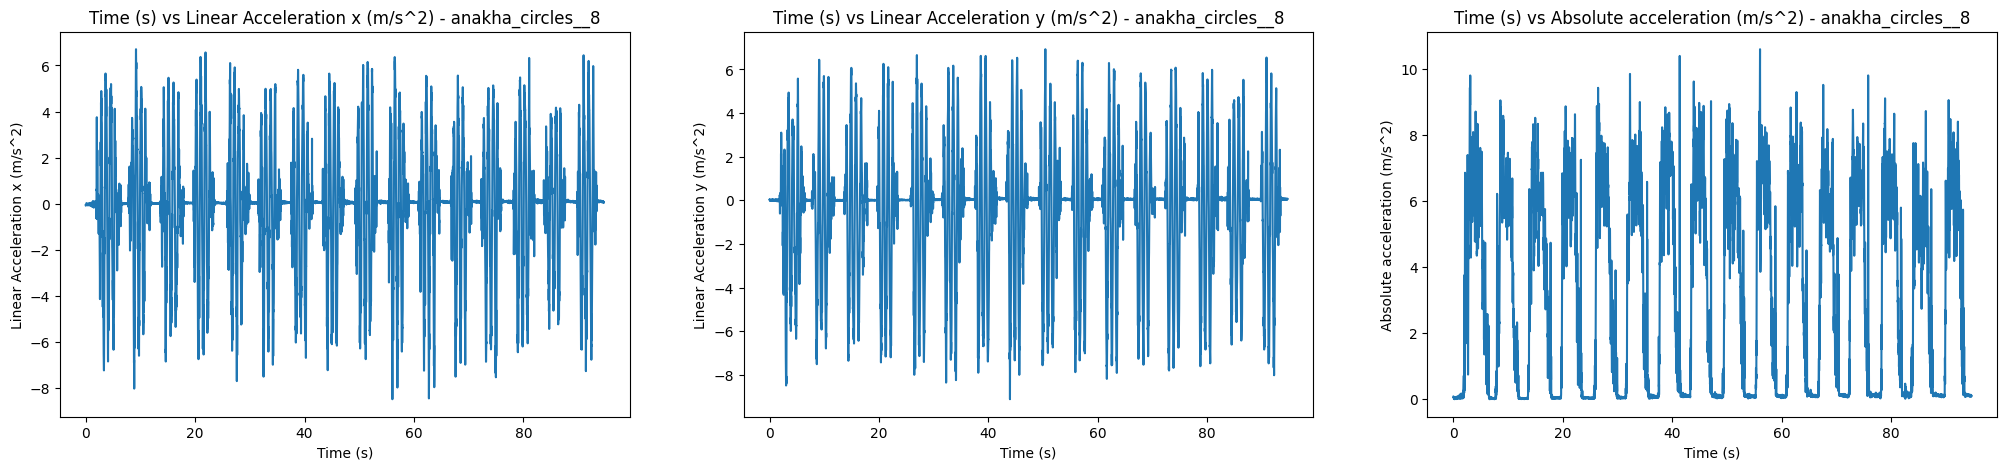

----------System control message 
displaying -> data_anakha_circles_9 -- Clockwise steep diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


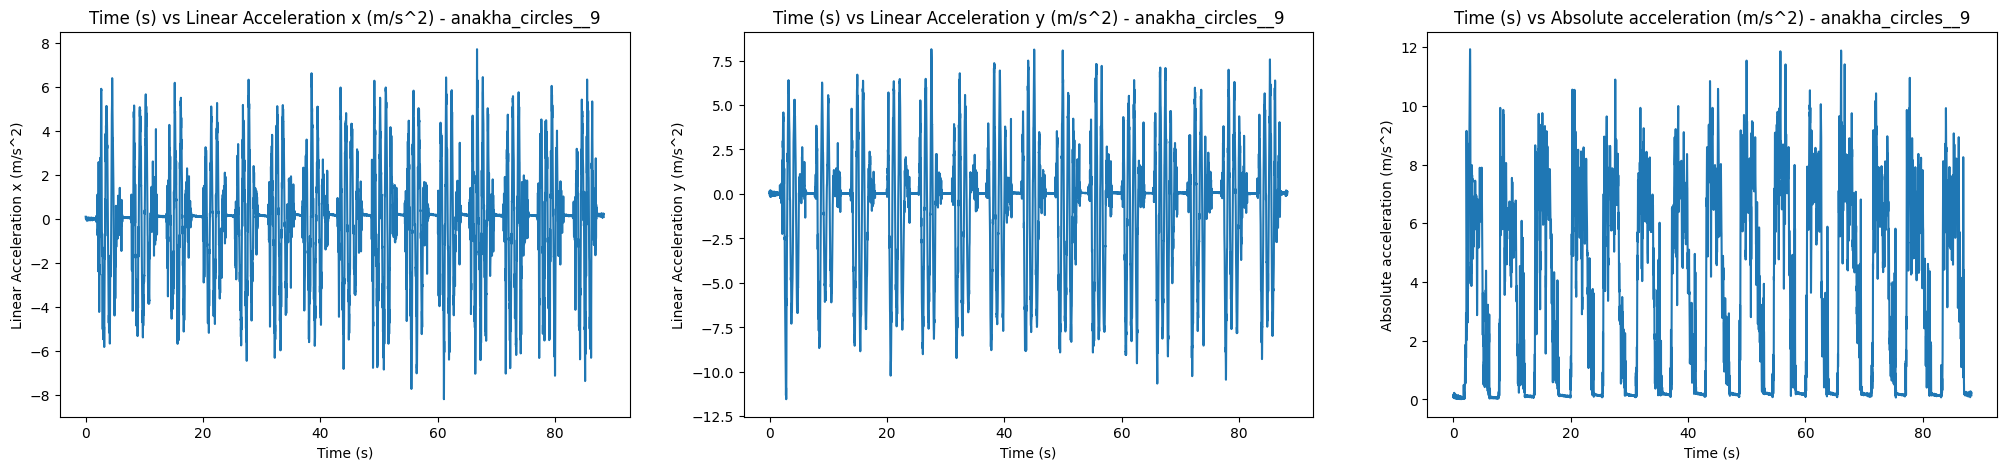

----------System control message 
displaying -> data_anakha_circles_10 -- clockwise vertical
----------System control message 
DataVisualization:create_base_plots: creating base plots


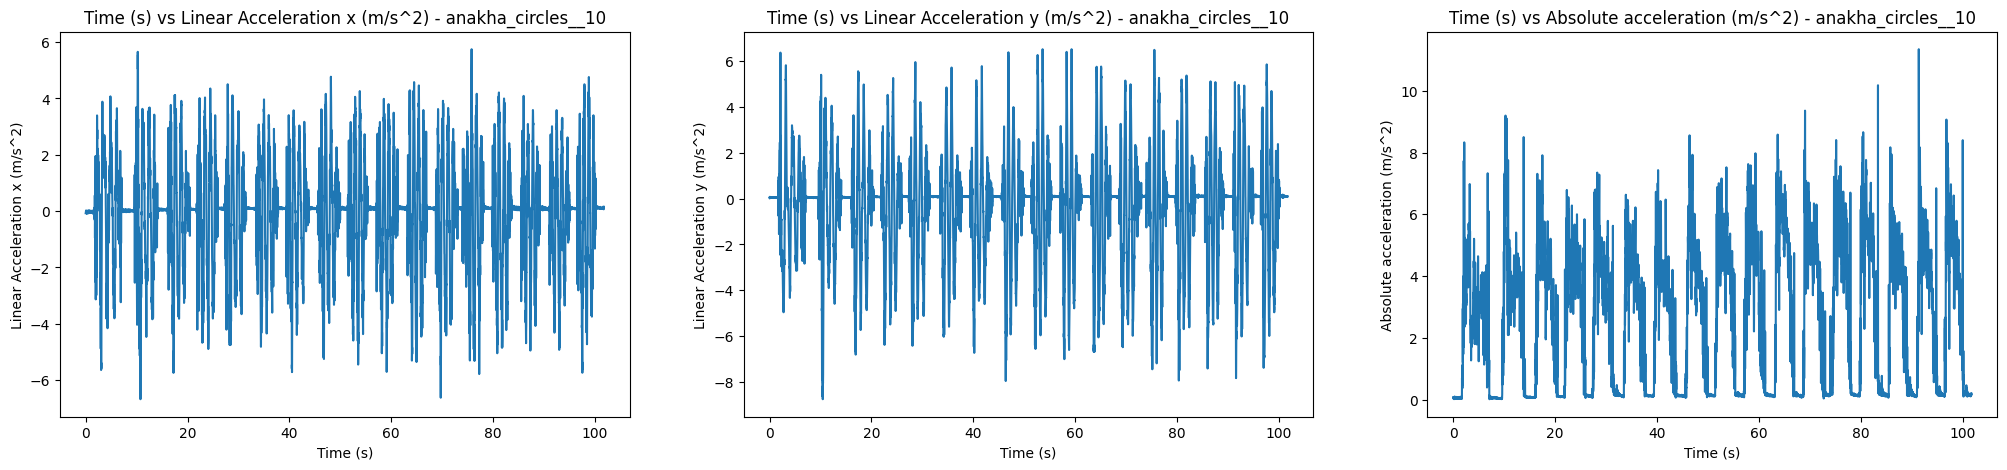

----------System control message 
displaying -> data_anakha_come here_1 -- Come here horizontal
----------System control message 
DataVisualization:create_base_plots: creating base plots


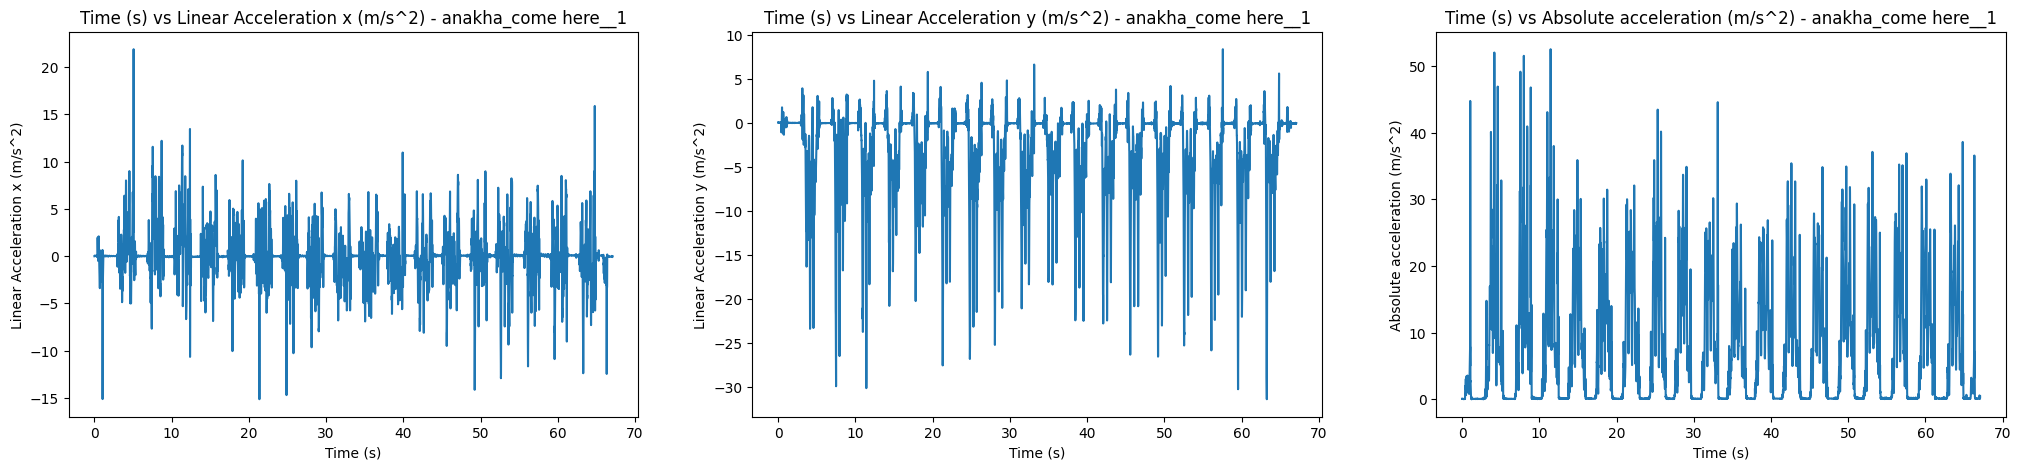

----------System control message 
displaying -> data_anakha_come here_2 -- Come here horizontal left exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


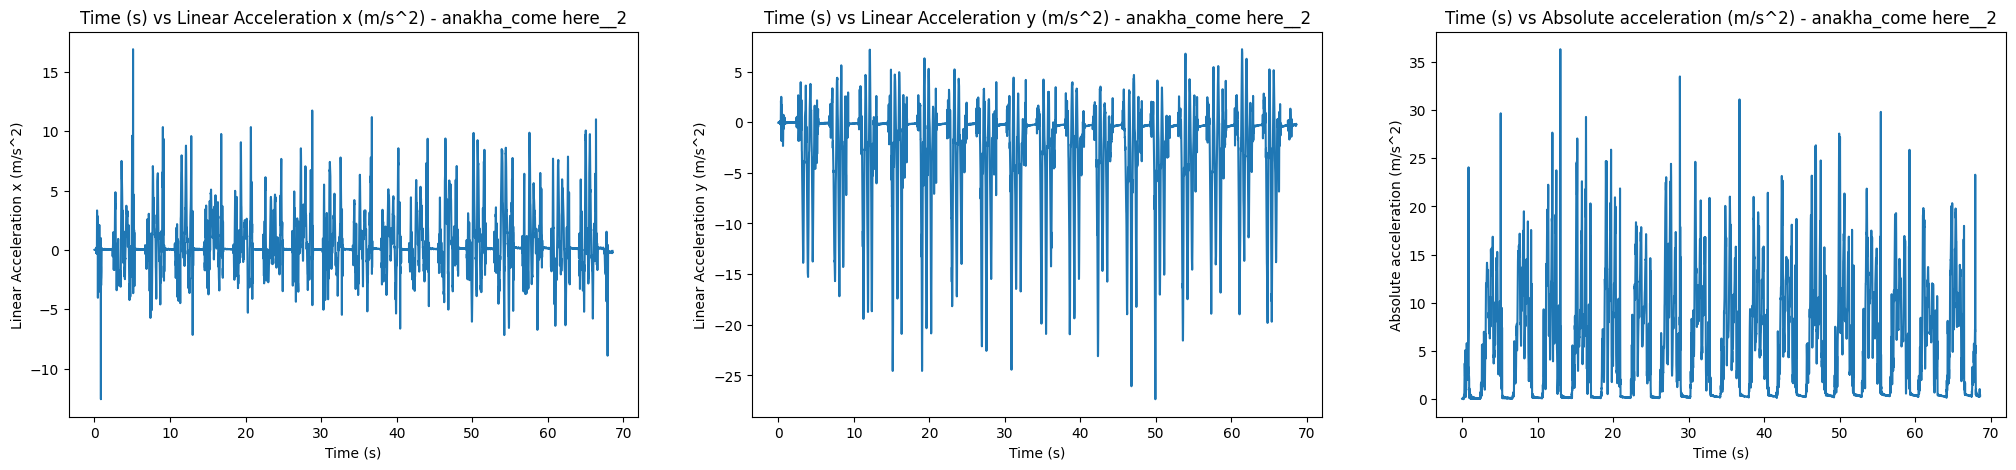

----------System control message 
displaying -> data_anakha_come here_3 -- Come here mid diagonal left
----------System control message 
DataVisualization:create_base_plots: creating base plots


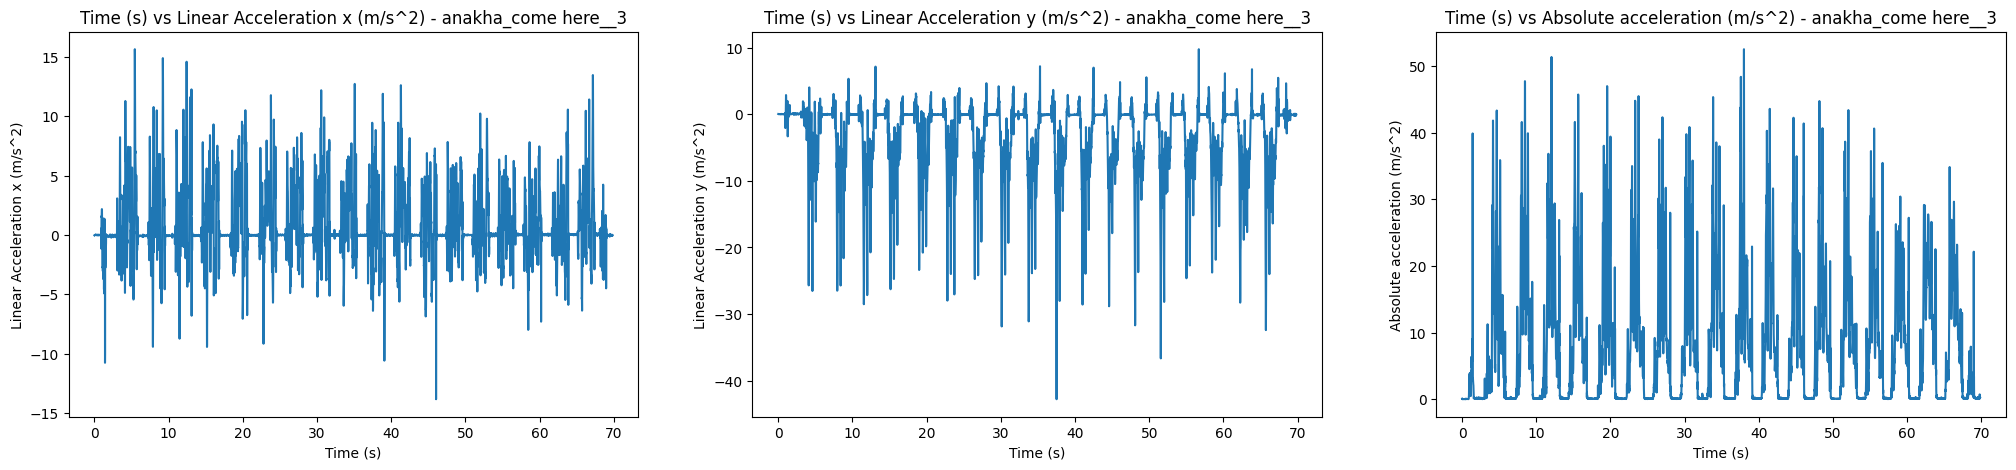

----------System control message 
displaying -> data_anakha_come here_4 -- Come here mid vertical left exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


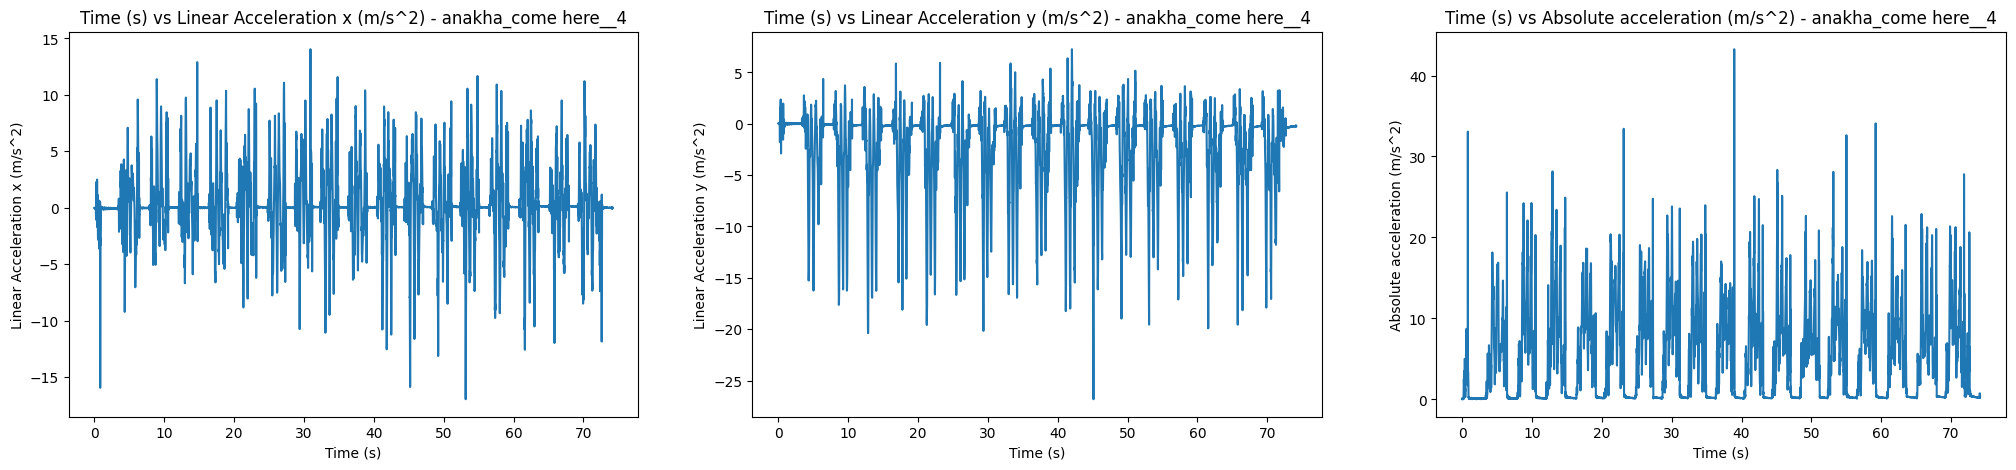

----------System control message 
displaying -> data_anakha_come here_5 -- Come here steep diagonal left
----------System control message 
DataVisualization:create_base_plots: creating base plots


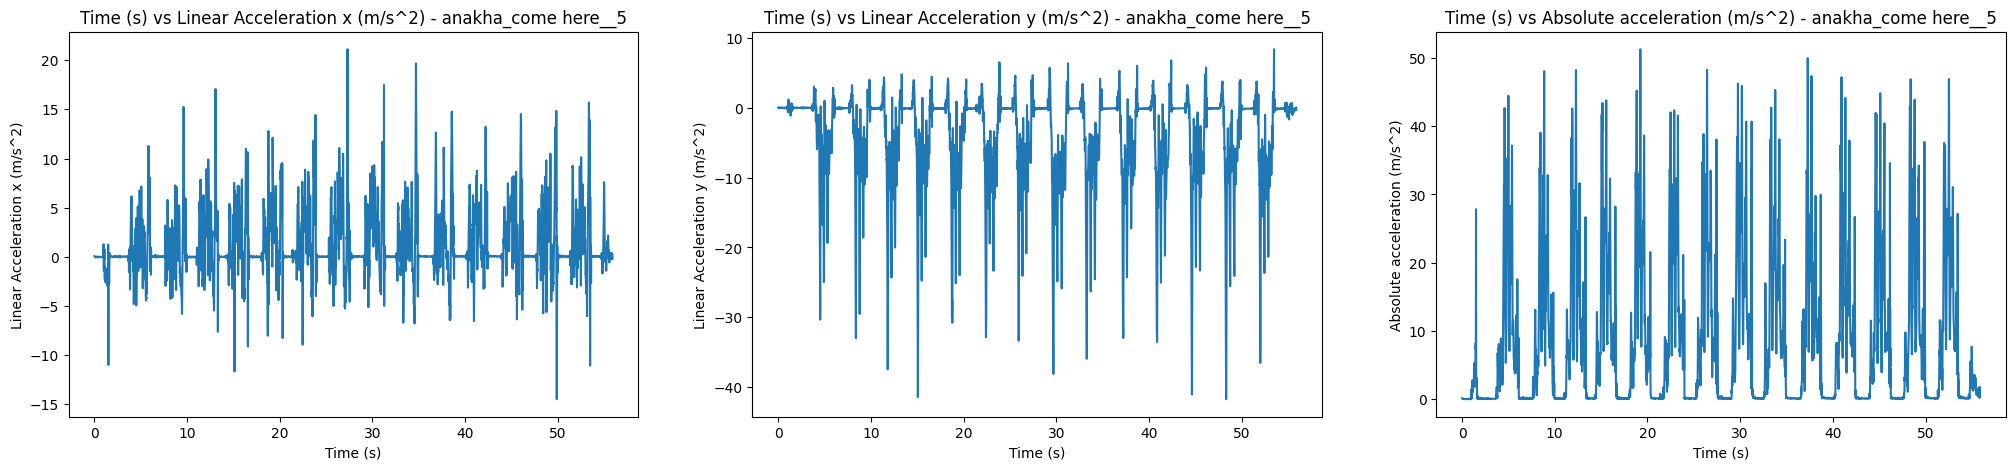

----------System control message 
displaying -> data_anakha_come here_6 -- Come here steep vertical left exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


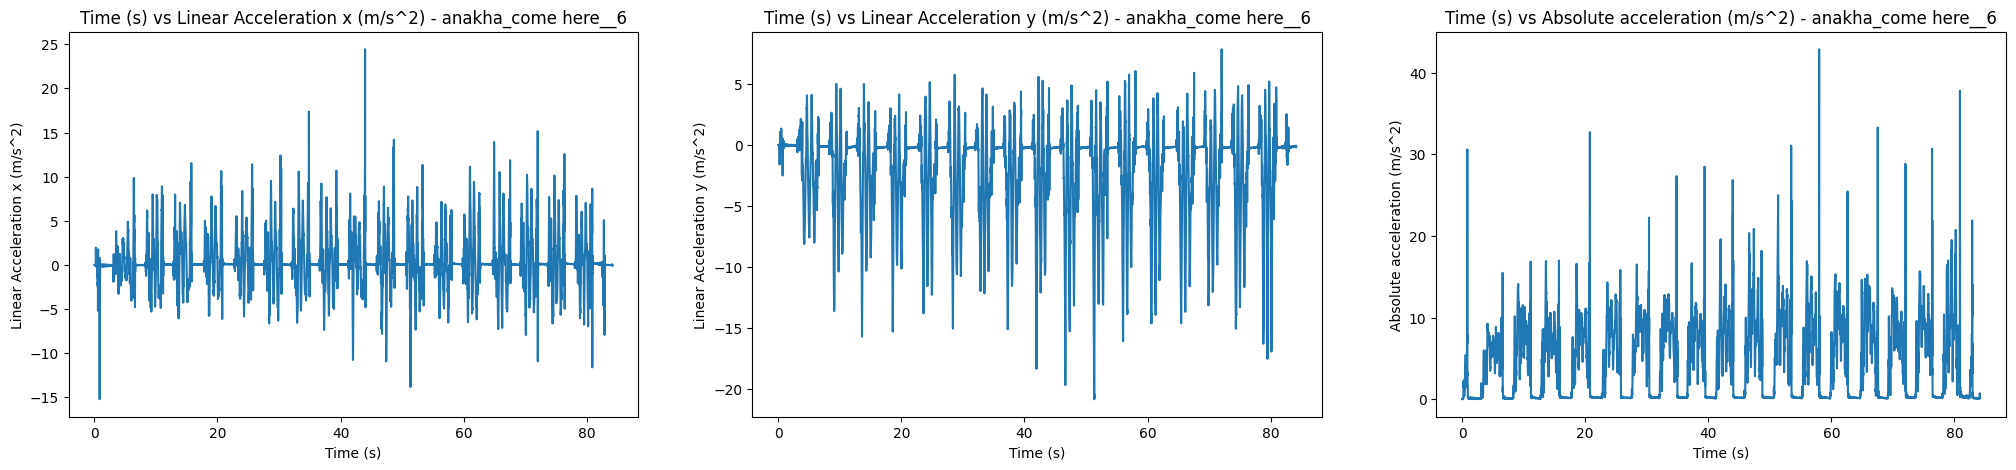

----------System control message 
displaying -> data_anakha_come here_7 -- Come here vertical
----------System control message 
DataVisualization:create_base_plots: creating base plots


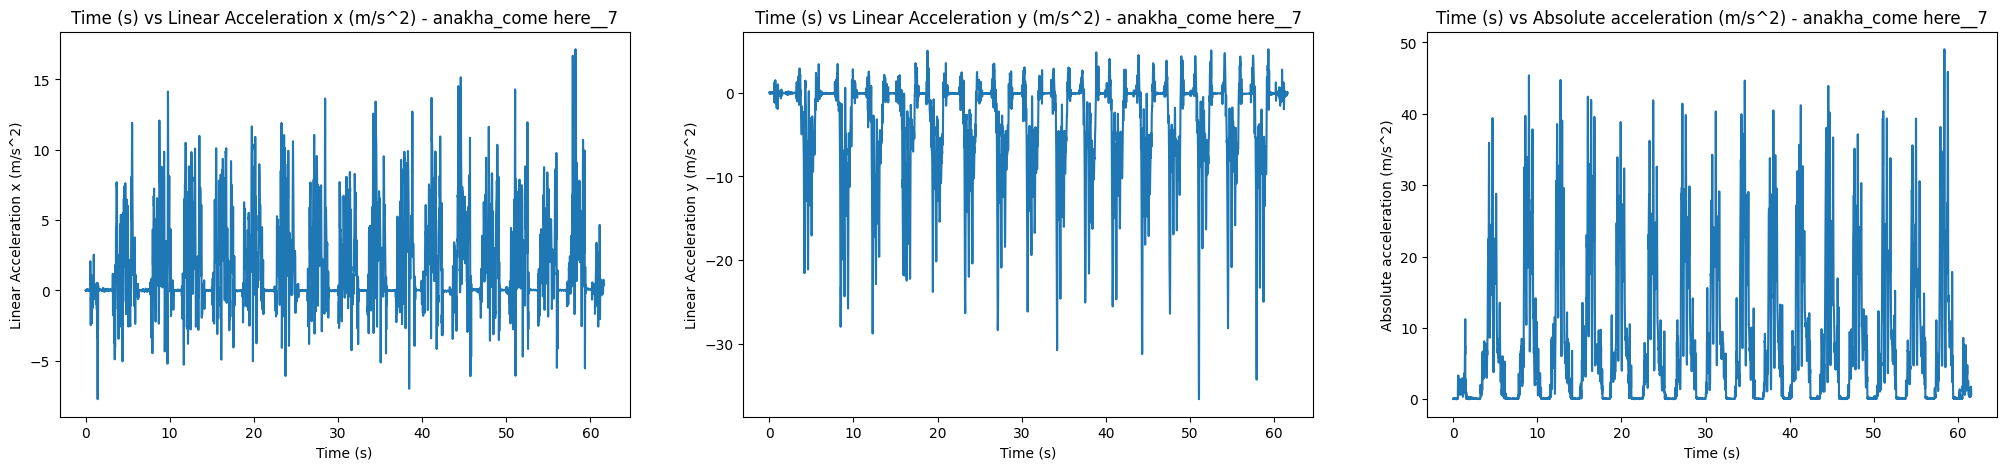

----------System control message 
displaying -> data_anakha_come here_8 -- Come here vertical exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


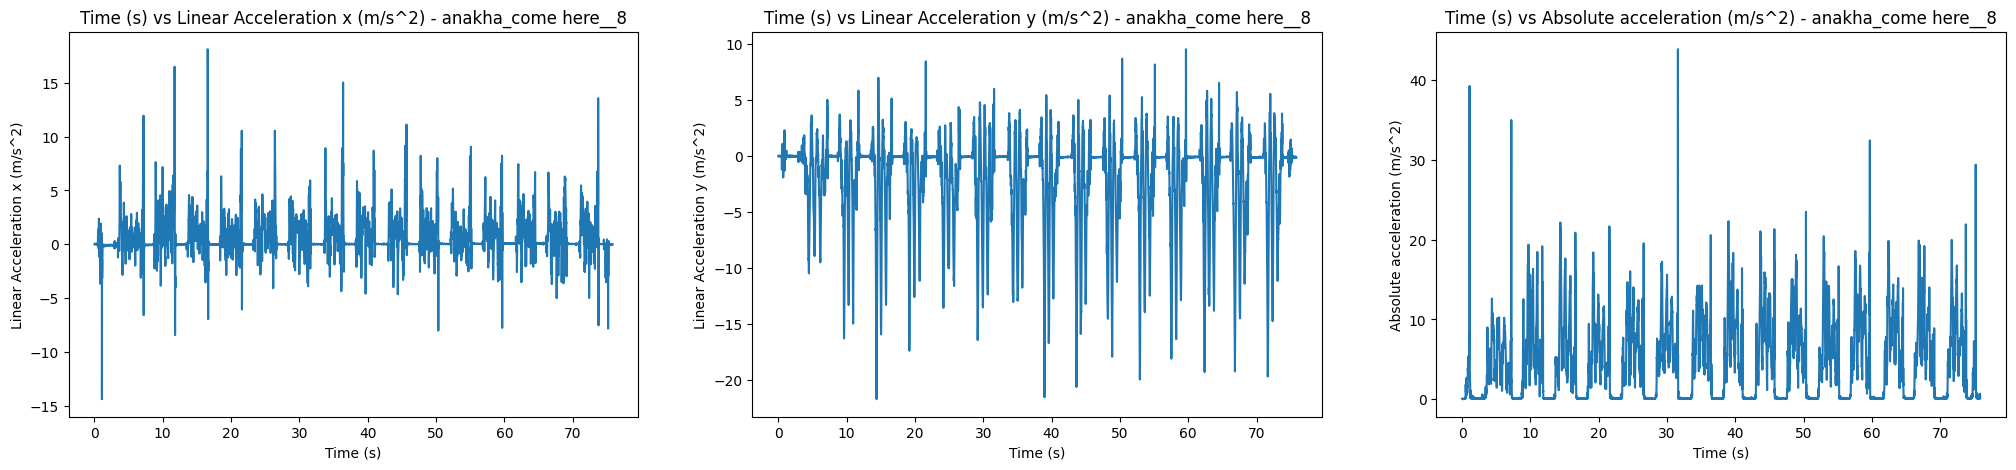

----------System control message 
displaying -> data_anakha_come here_9 -- Come here z axis mid diagonal left
----------System control message 
DataVisualization:create_base_plots: creating base plots


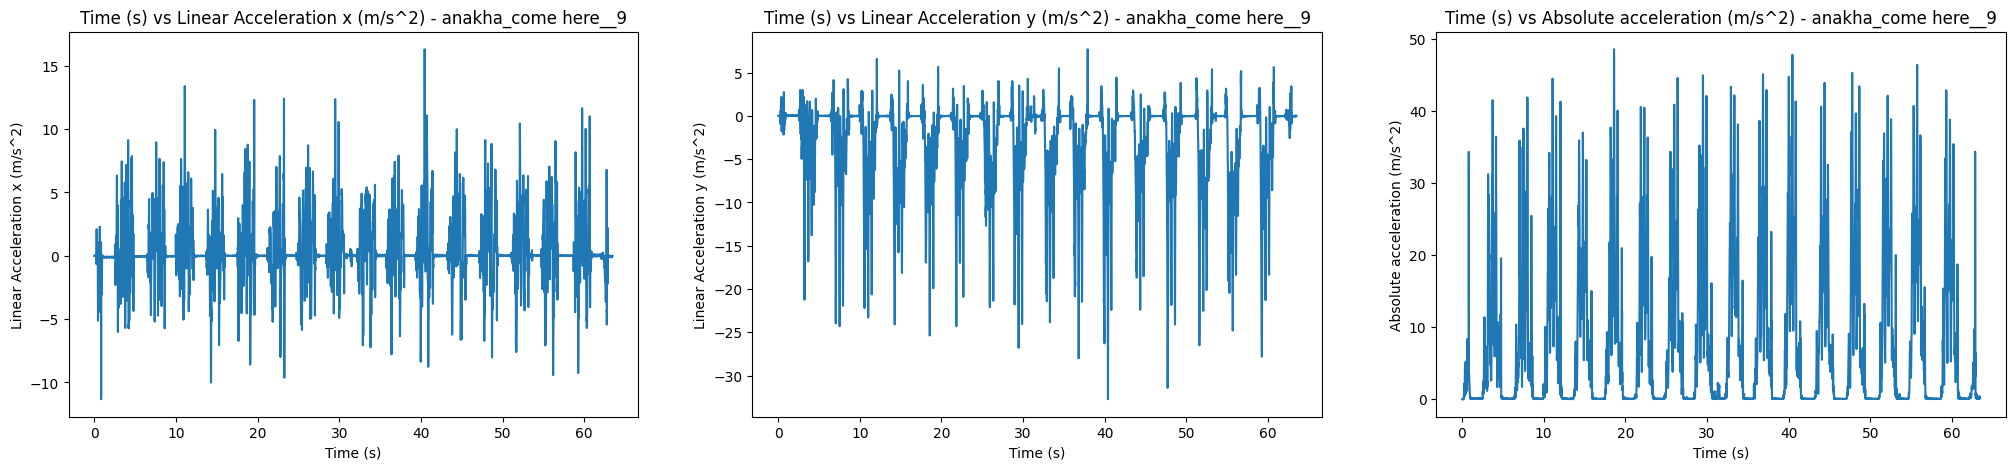

----------System control message 
displaying -> data_anakha_come here_10 -- Come here z axis mid vertical left exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


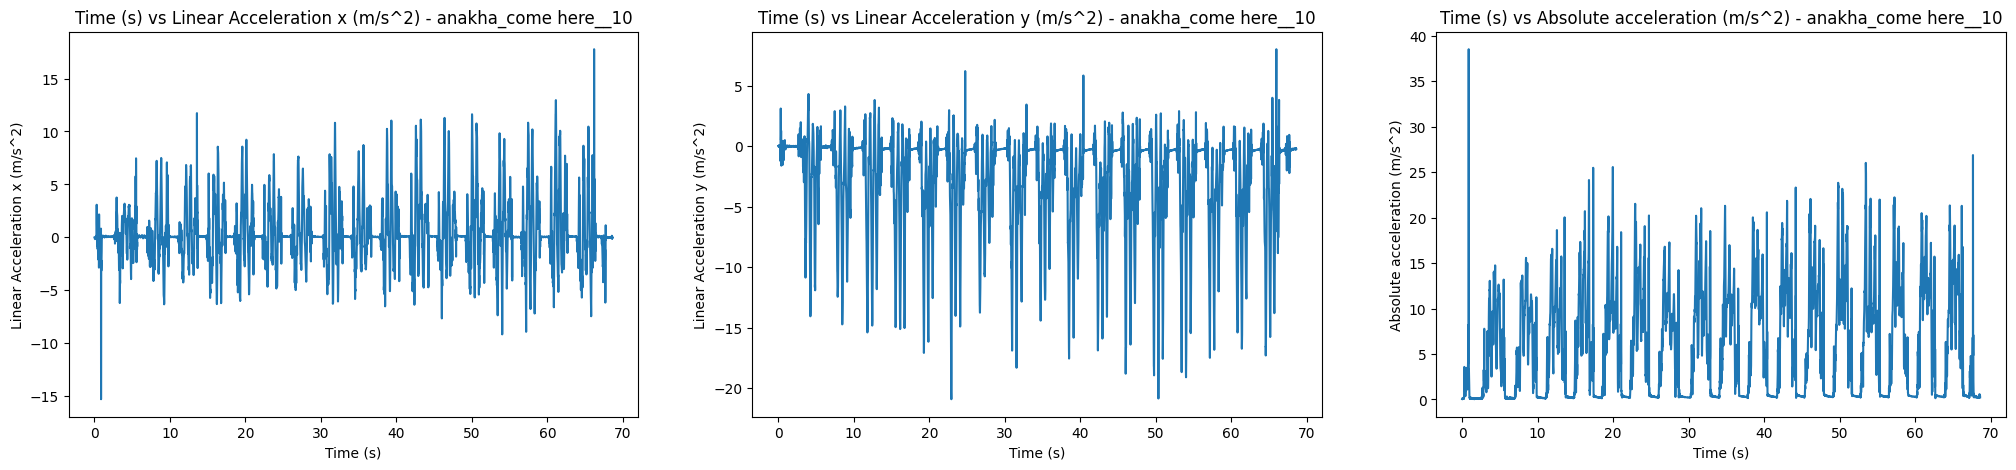

----------System control message 
displaying -> data_anakha_go away_1 -- Go away horizontal
----------System control message 
DataVisualization:create_base_plots: creating base plots


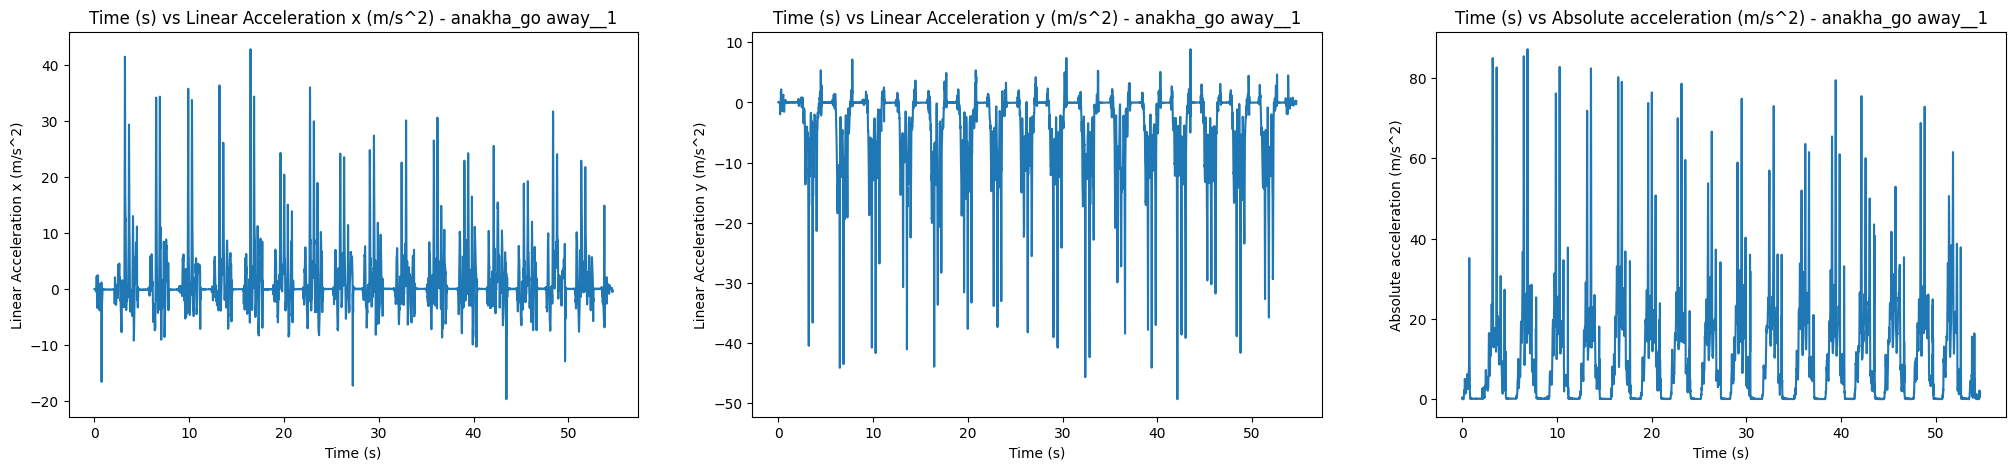

----------System control message 
displaying -> data_anakha_go away_2 -- Go away horizontal exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


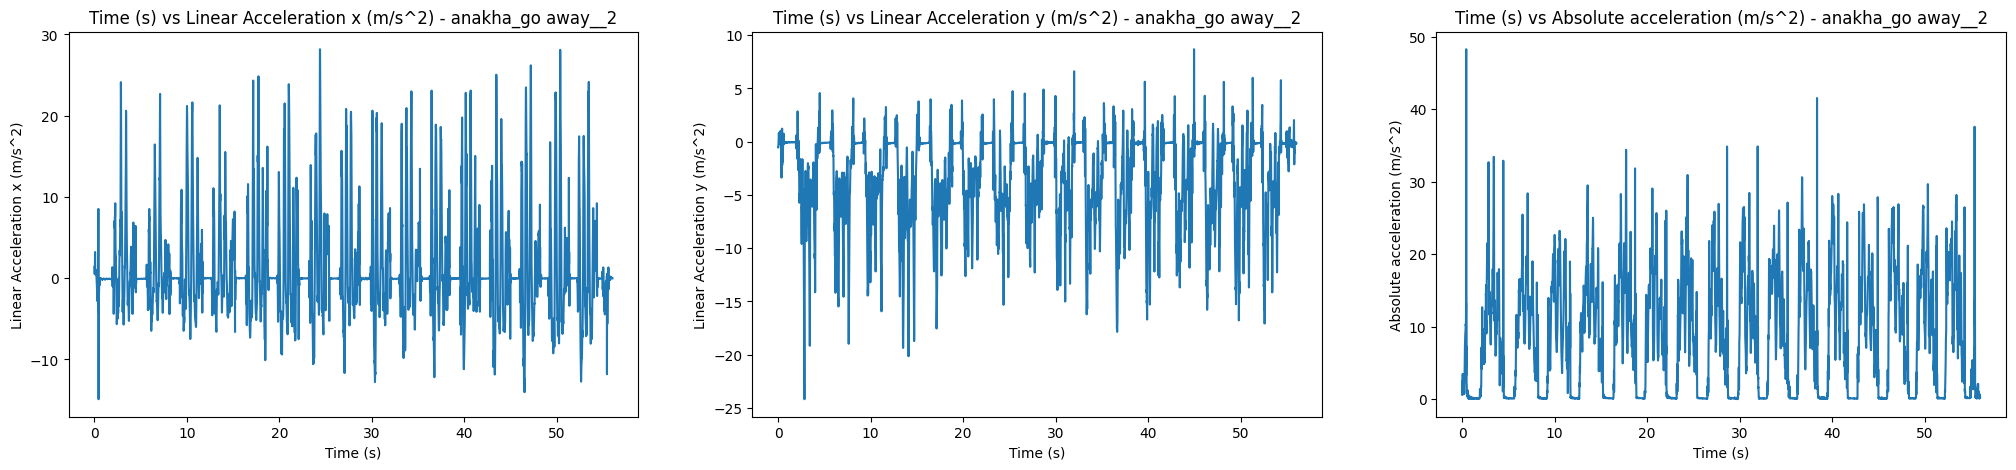

----------System control message 
displaying -> data_anakha_go away_3 -- Go away negative mid diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


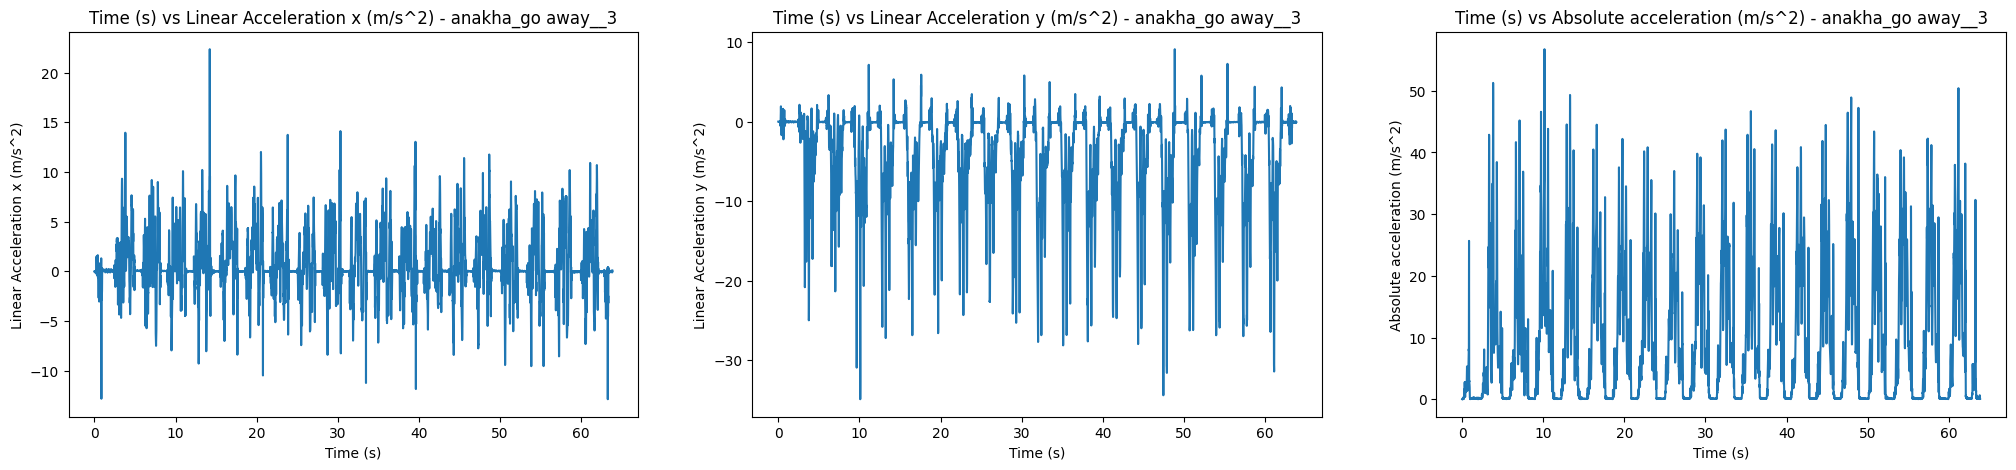

----------System control message 
displaying -> data_anakha_go away_4 -- Go away negative mid vertical exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


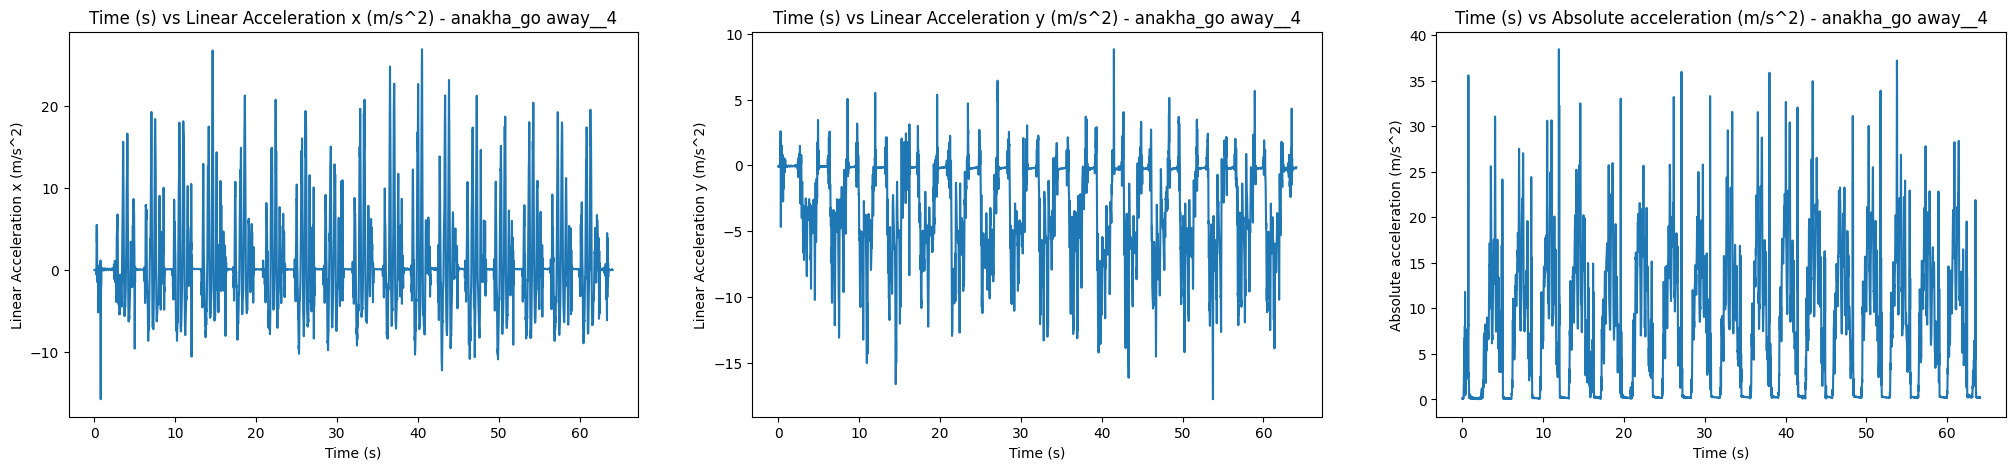

----------System control message 
displaying -> data_anakha_go away_5 -- Go away negative steep diagonal
----------System control message 
DataVisualization:create_base_plots: creating base plots


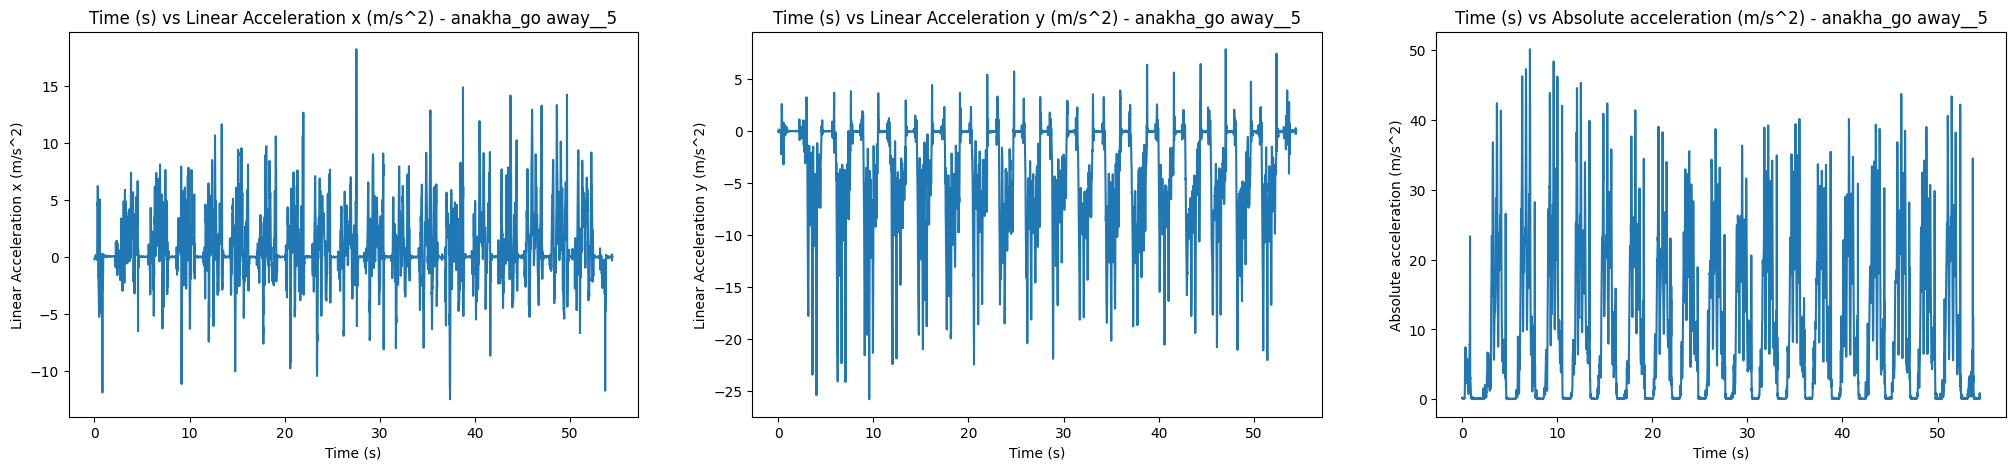

----------System control message 
displaying -> data_anakha_go away_6 -- Go away negative steep diagonal exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


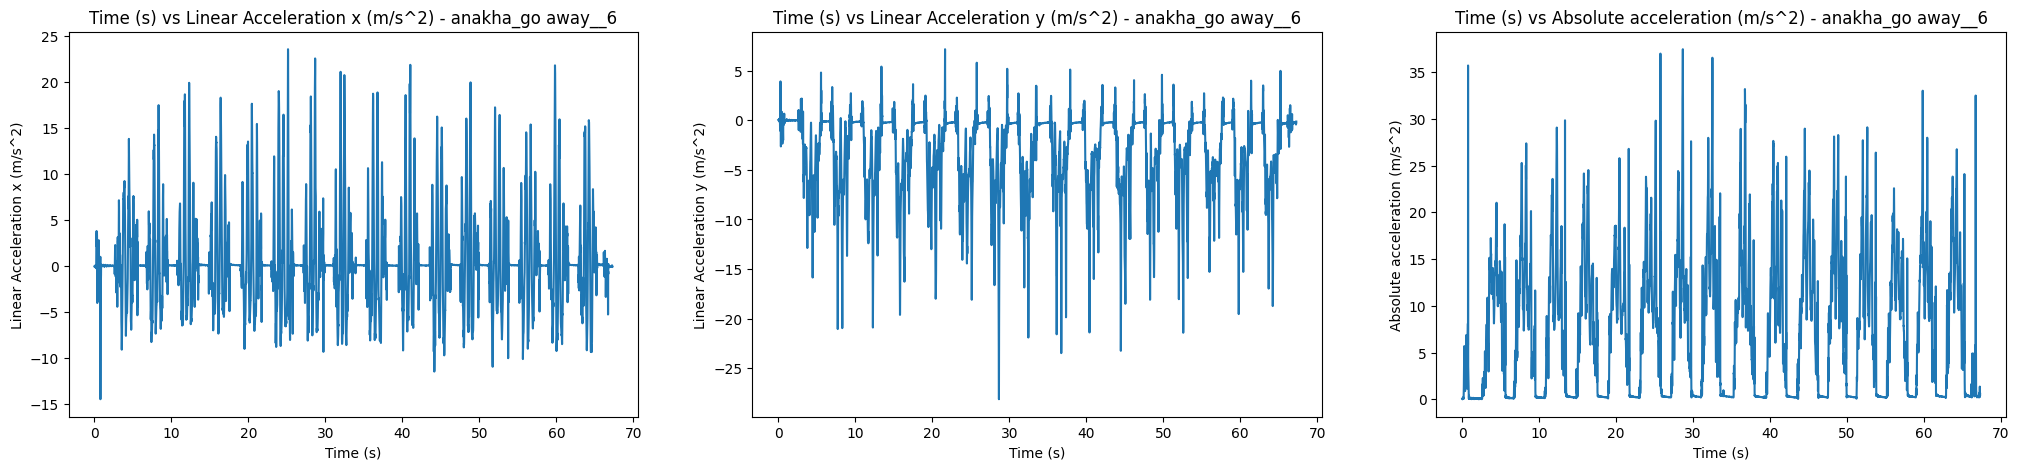

----------System control message 
displaying -> data_anakha_go away_7 -- Go away negative vertical
----------System control message 
DataVisualization:create_base_plots: creating base plots


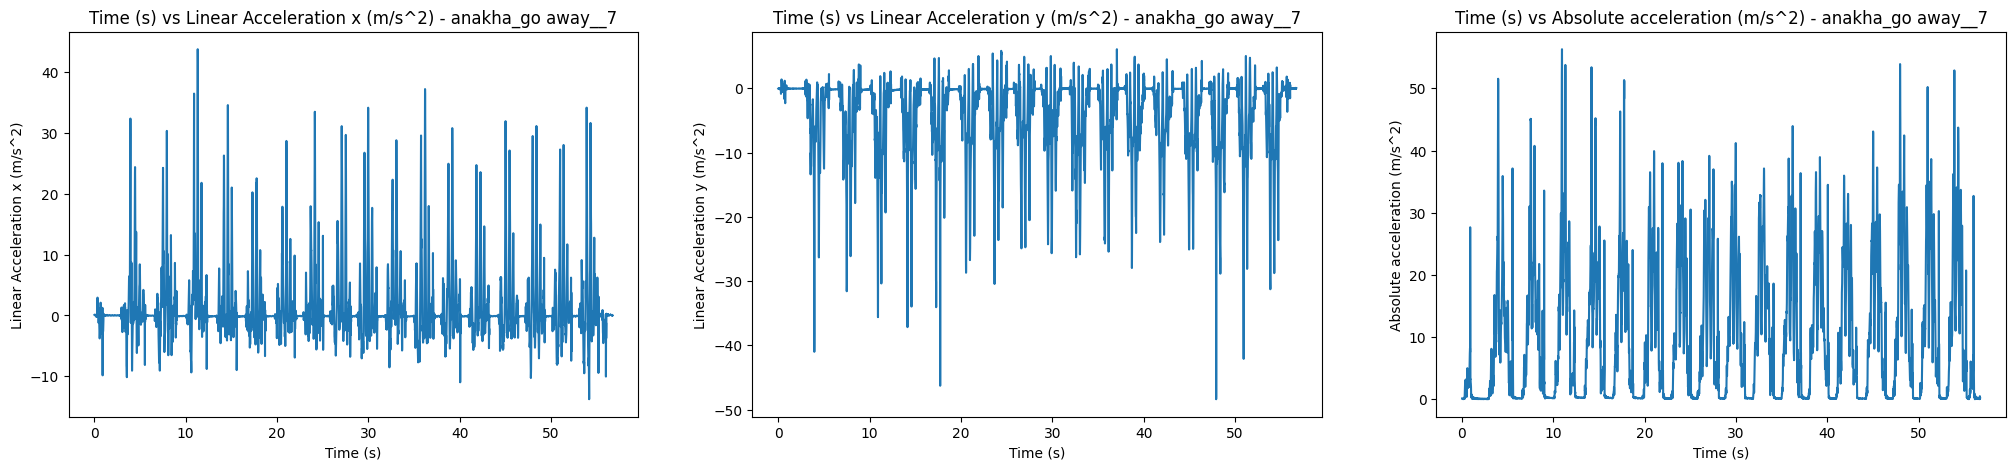

----------System control message 
displaying -> data_anakha_go away_8 -- Go away negative vertical exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


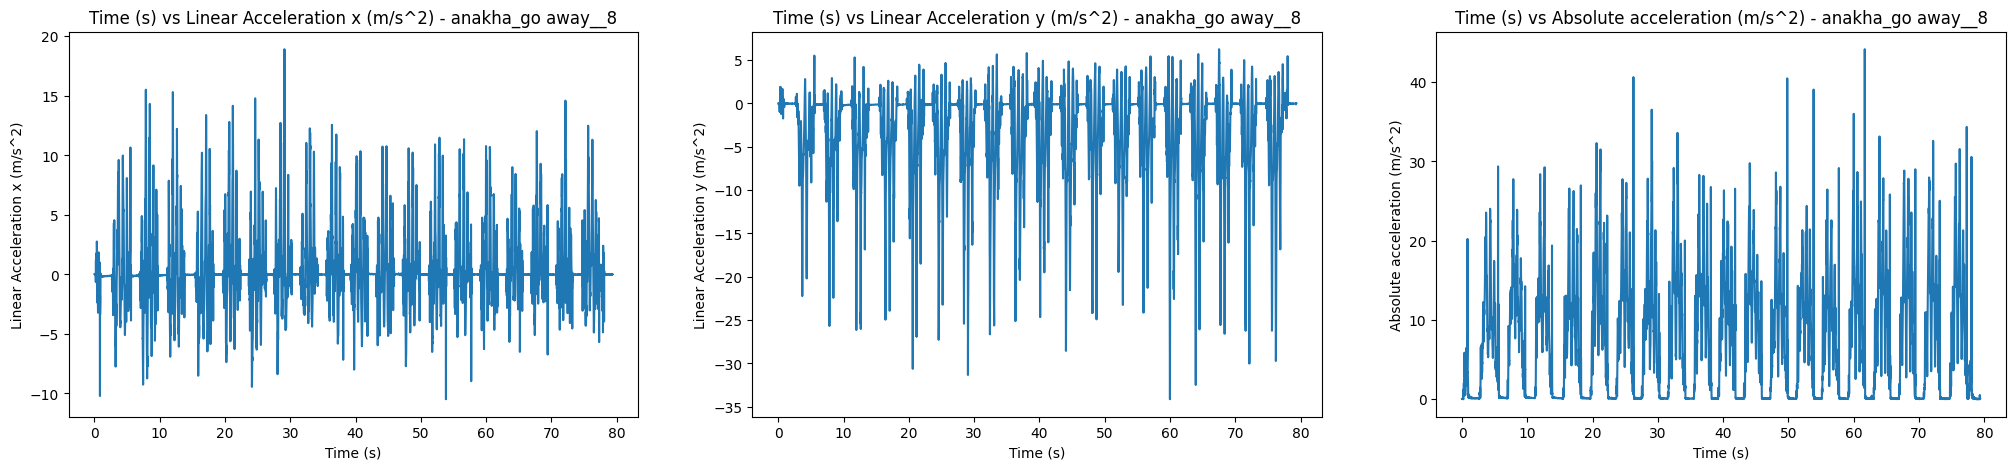

----------System control message 
displaying -> data_anakha_go away_9 -- Go away vertical standard
----------System control message 
DataVisualization:create_base_plots: creating base plots


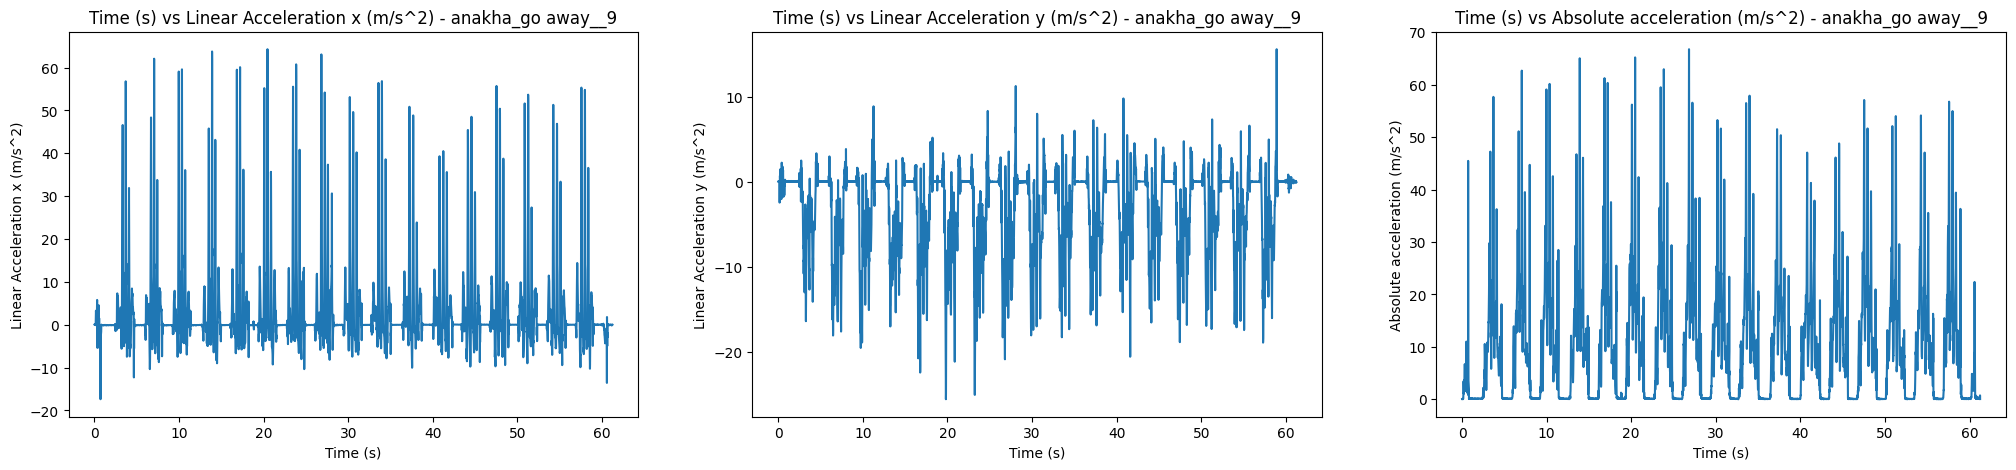

----------System control message 
displaying -> data_anakha_go away_10 -- Go away vertical standard exaggerated
----------System control message 
DataVisualization:create_base_plots: creating base plots


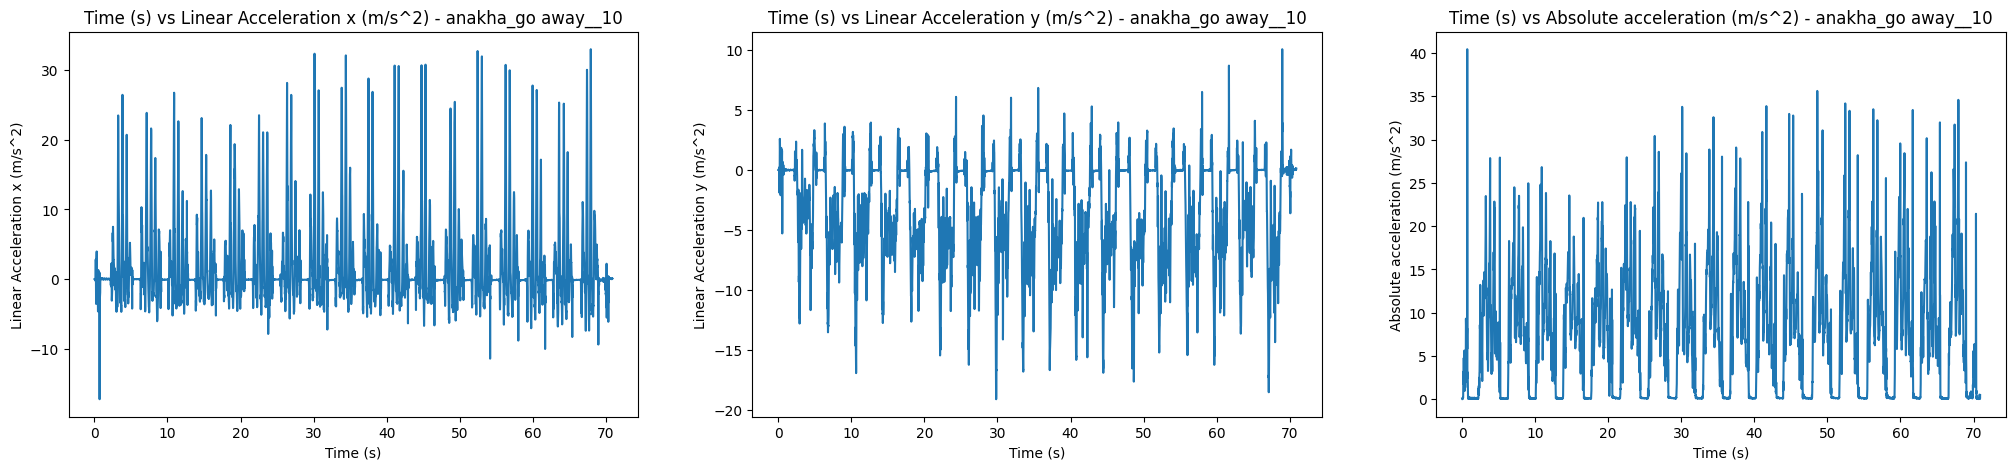

----------System control message 
displaying -> data_anakha_wave_1 -- Wave flat left focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


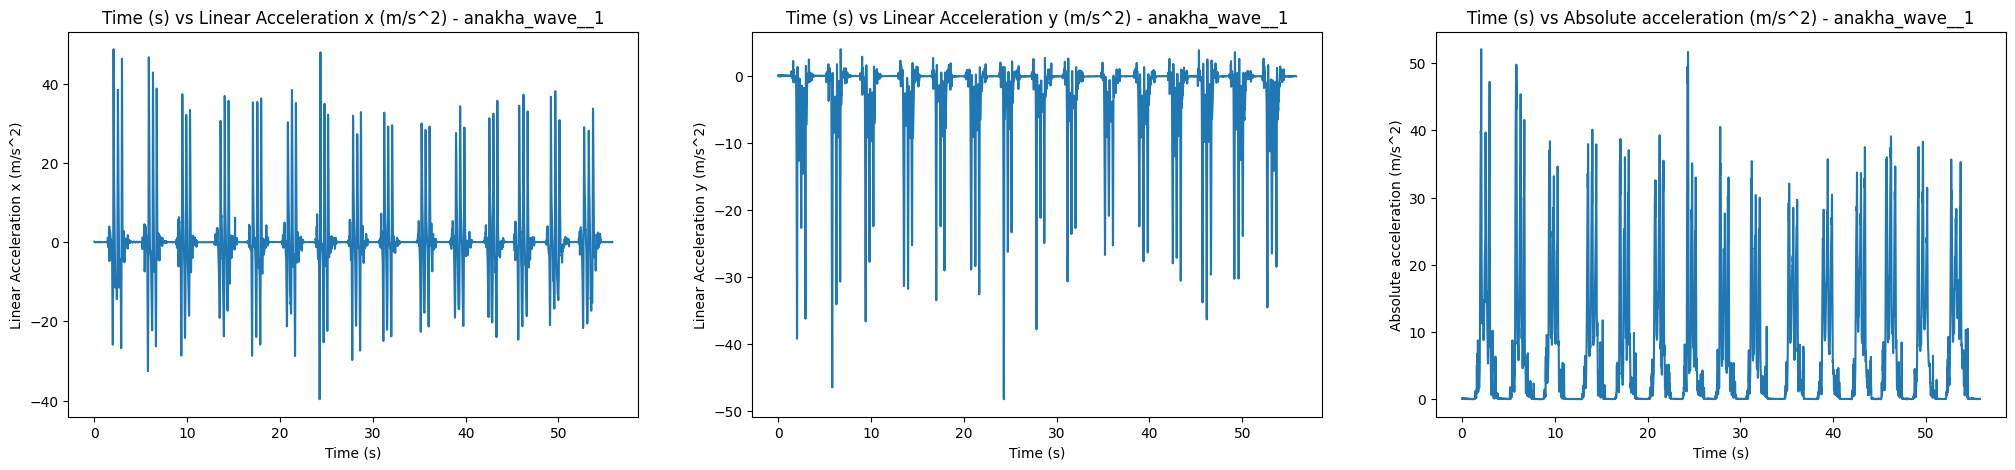

----------System control message 
displaying -> data_anakha_wave_2 -- Wave flat right focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


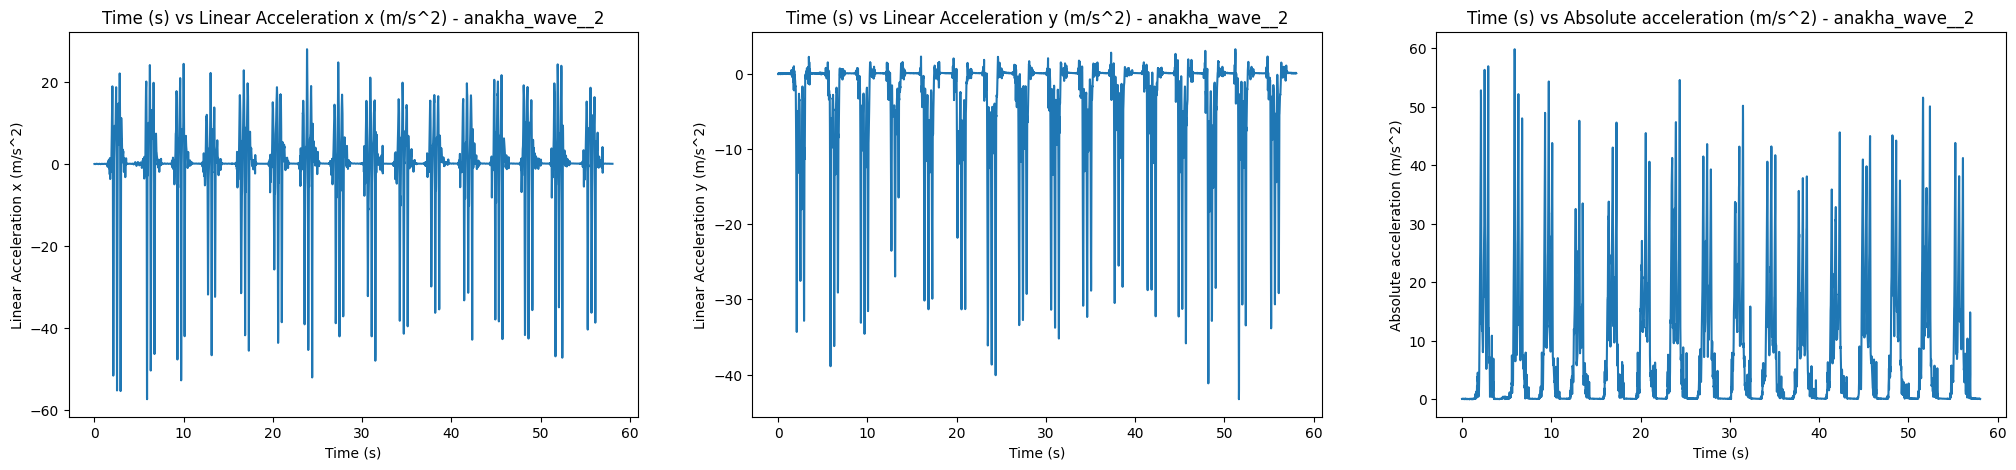

----------System control message 
displaying -> data_anakha_wave_3 -- Wave mid diagonal left focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


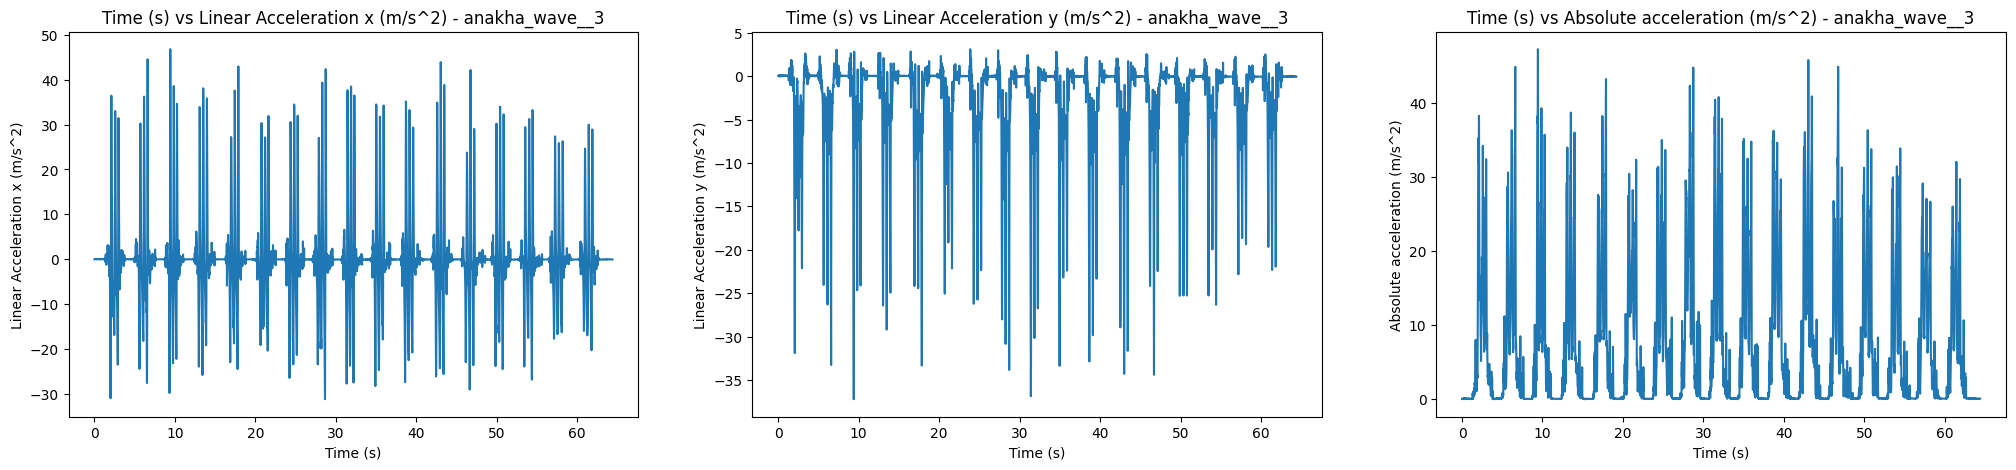

----------System control message 
displaying -> data_anakha_wave_4 -- Wave mid diagonal right focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


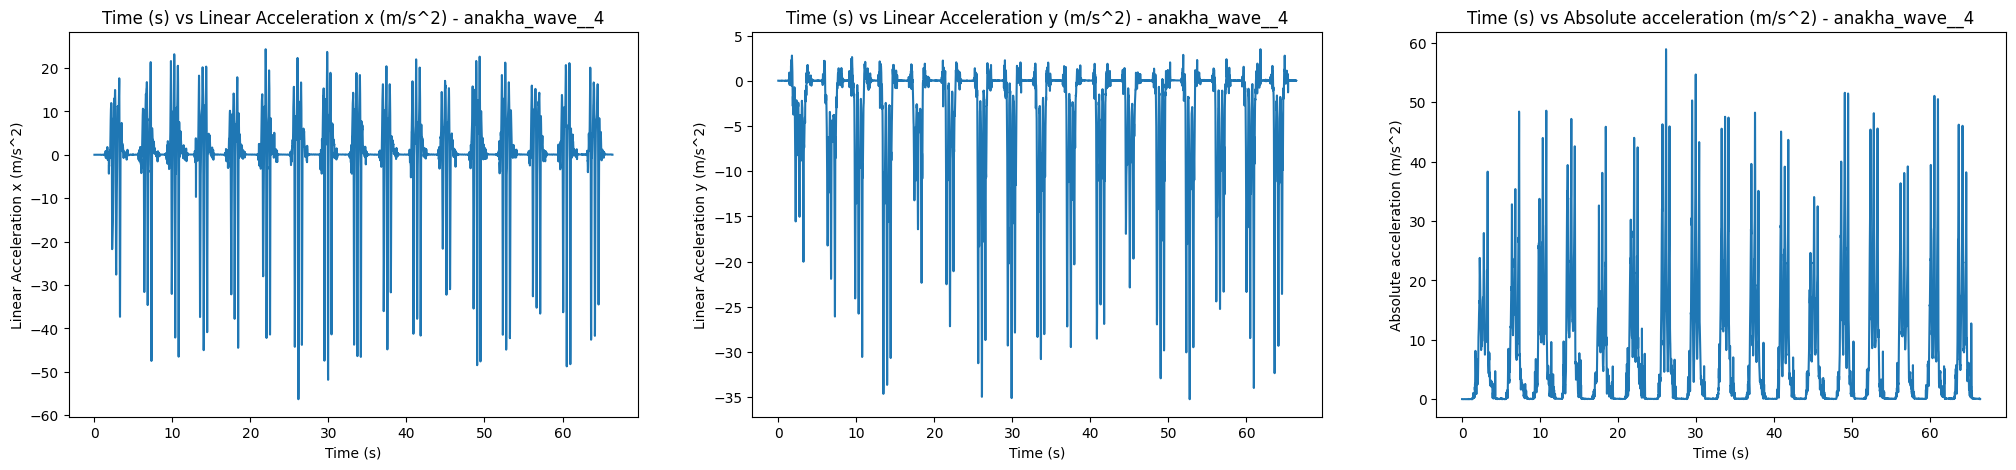

----------System control message 
displaying -> data_anakha_wave_5 -- Wave steep diagonal left focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


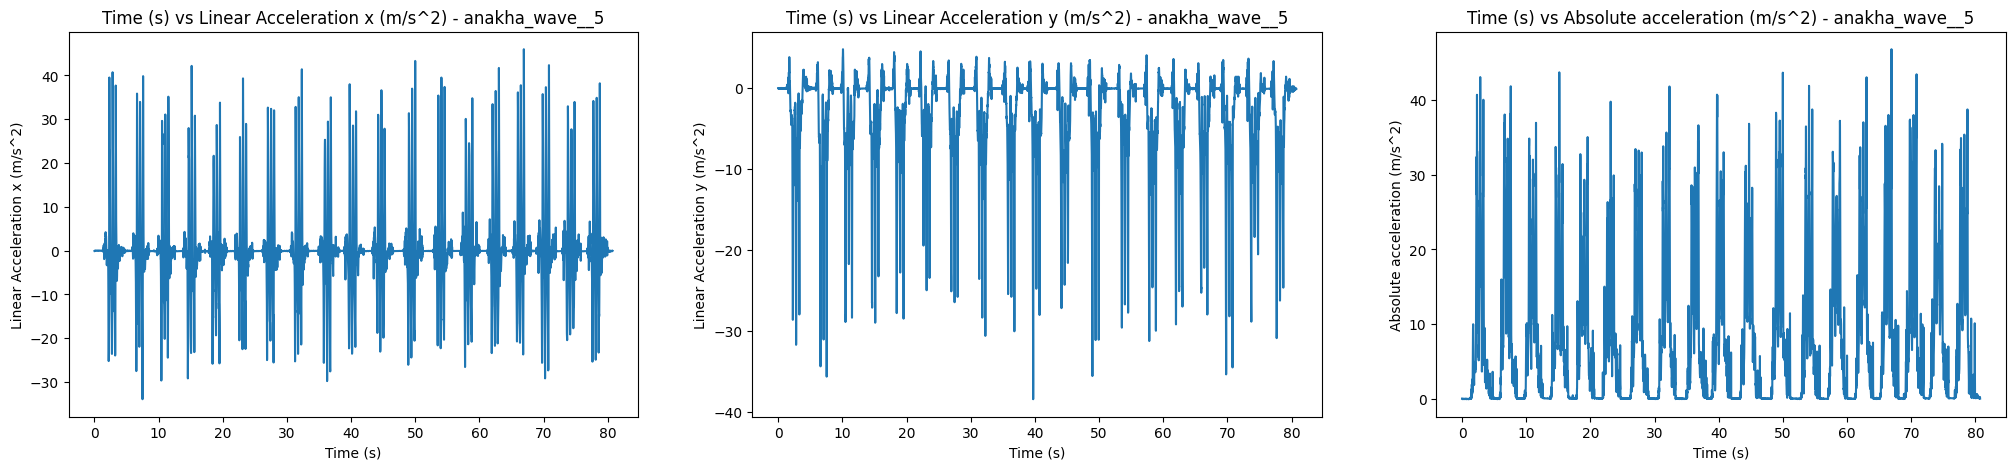

----------System control message 
displaying -> data_anakha_wave_6 -- Wave steep diagonal right focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


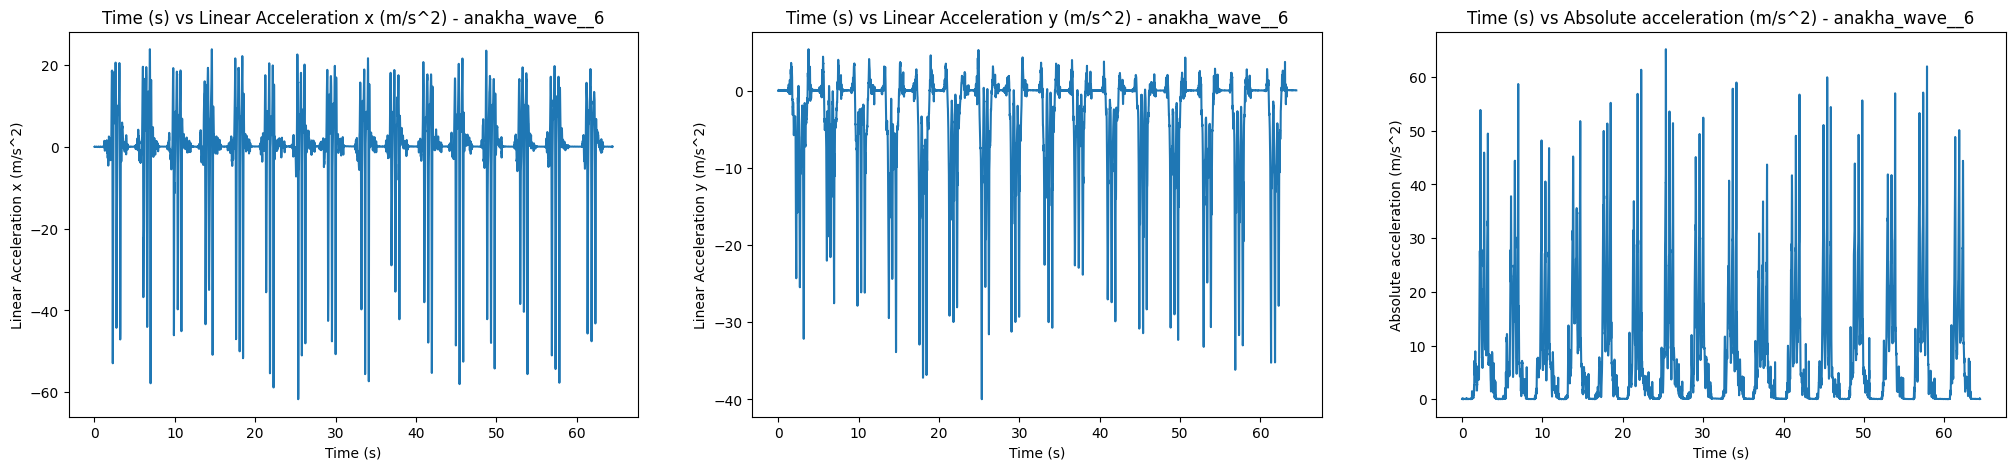

----------System control message 
displaying -> data_anakha_wave_7 -- Wave vertical left focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


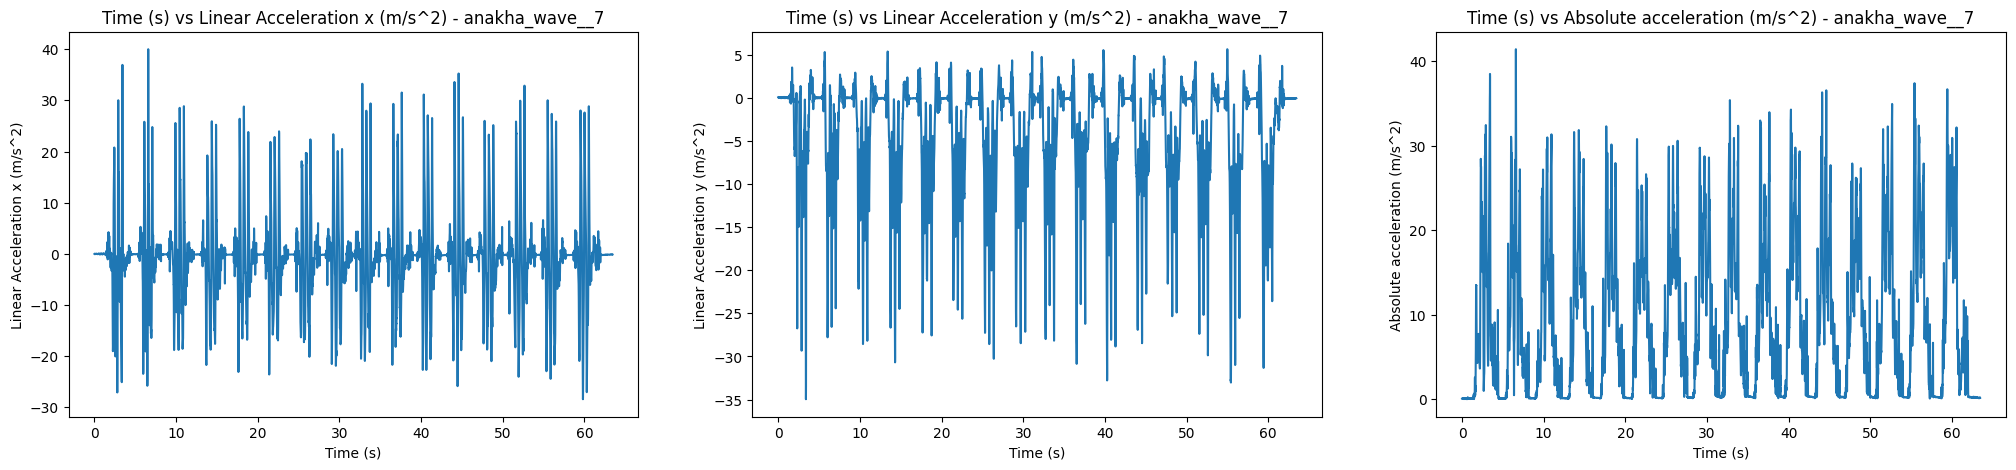

----------System control message 
displaying -> data_anakha_wave_8 -- Wave vertical right focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


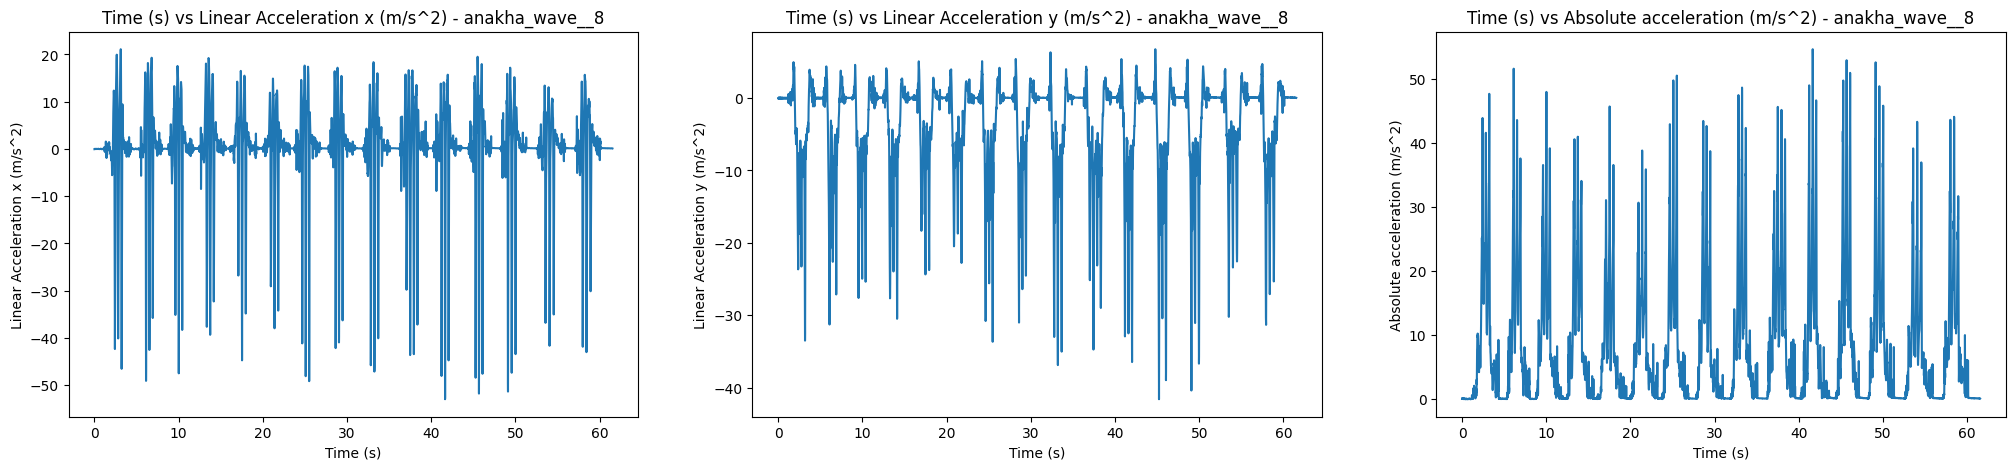

----------System control message 
displaying -> data_anakha_wave_9 -- Wave z axis backward focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


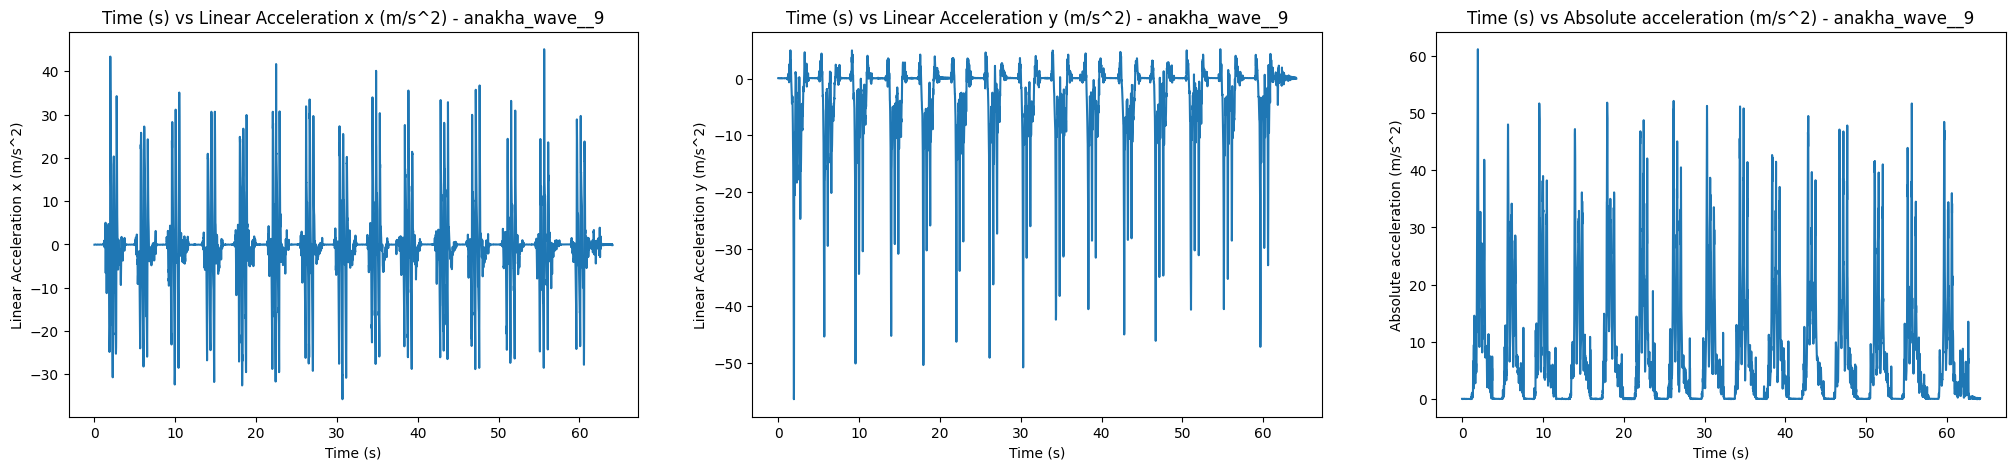

----------System control message 
displaying -> data_anakha_wave_10 -- Wave Z axis forward focused
----------System control message 
DataVisualization:create_base_plots: creating base plots


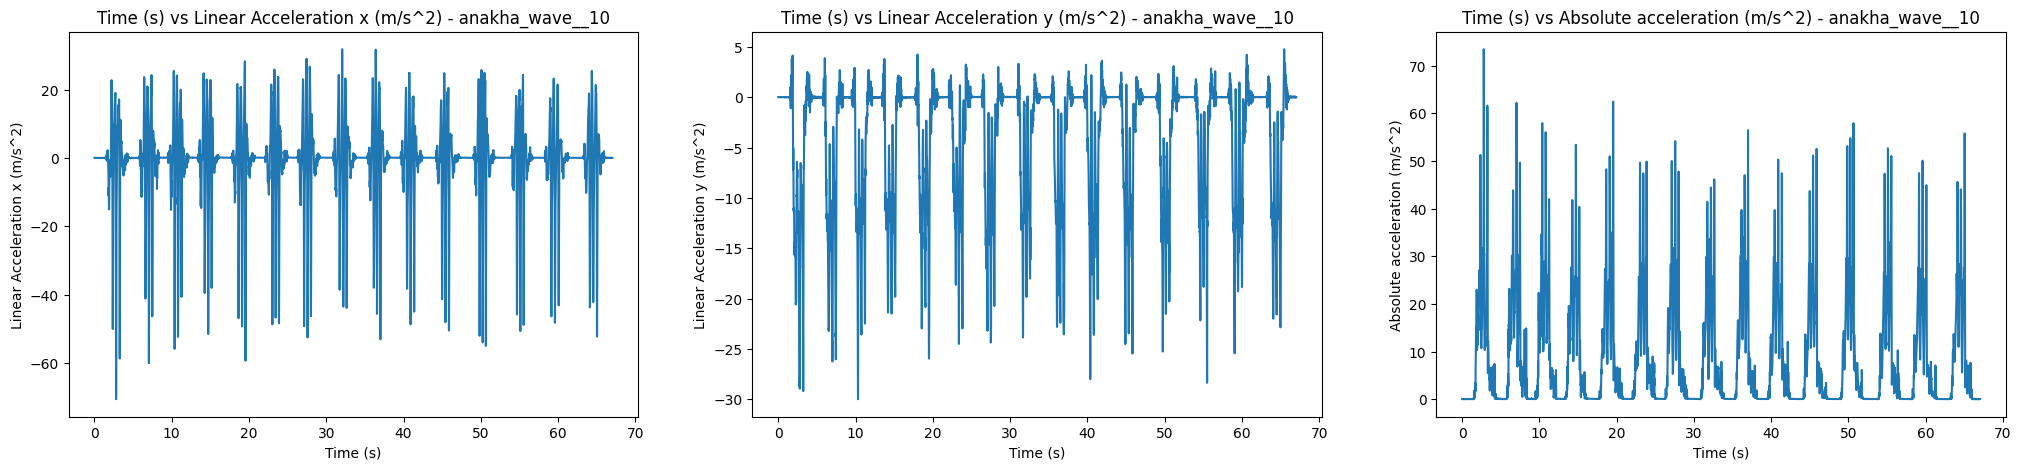

In [26]:
# visualize each gesture
dv = DataVisualization(data)

# list of gestures names for anakha
gestures = ['circles', 'come here', 'go away', 'wave']

# plotting linear sub plots for each gesture within the anakha key in the data dictionary
for gesture in gestures:
    for i in range(1, 11):
        plot_name = 'anakha_'+gesture+'_'+'_'+str(i)
        print_sys_msg('displaying -> '+'data_anakha_'+gesture+'_'+str(i) + ' -- ' + data.data['data_anakha_'+gesture+'_'+str(i)]['Gesture'][i-1])
        data.df = data.data['data_anakha_'+gesture+'_'+str(i)]
        dv.sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Linear Acceleration x (m/s^2)'], ['line', 'Time (s)', 'Linear Acceleration y (m/s^2)'], ['line', 'Time (s)', 'Absolute acceleration (m/s^2)']], 25, 5, plot_name)

In [ ]:
temp_df = None

# import each key from the data dictionary into the temp_df dataframe to be processed seperately
for key in data.data.keys():
    if temp_df is None:
        temp_df = data.data[key]
    else:
        temp_df = pd.concat([temp_df, data.data[key]], ignore_index=True)
    
    data.df = temp_df
    dv.sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Linear Acceleration x (m/s^2)'], ['line', 'Time (s)', 'Linear Acceleration y (m/s^2)'], ['line', 'Time (s)', 'Absolute acceleration (m/s^2)']], 25, 5, "temp")
    # scatter plot of the above
    dv.sns_create_linear_sub_plots('left_to_right', [['scatter', 'Time (s)', 'Linear Acceleration x (m/s^2)'], ['scatter', 'Time (s)', 'Linear Acceleration y (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)']], 25, 5, "temp")


    # adding smoothinng to the data
    temp_df['Linear Acceleration x (m/s^2)'] = temp_df['Linear Acceleration x (m/s^2)'].rolling(window=10).mean()
    temp_df['Linear Acceleration y (m/s^2)'] = temp_df['Linear Acceleration y (m/s^2)'].rolling(window=10).mean()
    temp_df['Linear Acceleration z (m/s^2)'] = temp_df['Linear Acceleration z (m/s^2)'].rolling(window=10).mean()

    # making peaks and valleys of Linear Acceleration x, Linear Acceleration y, and Absolute acceleration in temp_df

    # peaks and valleys of Linear Acceleration x
    temp_df['Linear Acceleration x Peaks'] = temp_df['Linear Acceleration x (m/s^2)'][(temp_df['Linear Acceleration x (m/s^2)'].shift(1) < temp_df['Linear Acceleration x (m/s^2)']) & (temp_df['Linear Acceleration x (m/s^2)'].shift(-1) < temp_df['Linear Acceleration x (m/s^2)'])]
    temp_df['Linear Acceleration x Valleys'] = temp_df['Linear Acceleration x (m/s^2)'][(temp_df['Linear Acceleration x (m/s^2)'].shift(1) > temp_df['Linear Acceleration x (m/s^2)']) & (temp_df['Linear Acceleration x (m/s^2)'].shift(-1) > temp_df['Linear Acceleration x (m/s^2)'])]

    # peaks and valleys of Linear Acceleration y
    temp_df['Linear Acceleration y Peaks'] = temp_df['Linear Acceleration y (m/s^2)'][(temp_df['Linear Acceleration y (m/s^2)'].shift(1) < temp_df['Linear Acceleration y (m/s^2)']) & (temp_df['Linear Acceleration y (m/s^2)'].shift(-1) < temp_df['Linear Acceleration y (m/s^2)'])]
    temp_df['Linear Acceleration y Valleys'] = temp_df['Linear Acceleration y (m/s^2)'][(temp_df['Linear Acceleration y (m/s^2)'].shift(1) > temp_df['Linear Acceleration y (m/s^2)']) & (temp_df['Linear Acceleration y (m/s^2)'].shift(-1) > temp_df['Linear Acceleration y (m/s^2)'])]

    # peaks and valleys of Absolute acceleration
    temp_df['Absolute acceleration Peaks'] = temp_df['Absolute acceleration (m/s^2)'][(temp_df['Absolute acceleration (m/s^2)'].shift(1) < temp_df['Absolute acceleration (m/s^2)']) & (temp_df['Absolute acceleration (m/s^2)'].shift(-1) < temp_df['Absolute acceleration (m/s^2)'])]
    temp_df['Absolute acceleration Valleys'] = temp_df['Absolute acceleration (m/s^2)'][(temp_df['Absolute acceleration (m/s^2)'].shift(1) > temp_df['Absolute acceleration (m/s^2)']) & (temp_df['Absolute acceleration (m/s^2)'].shift(-1) > temp_df['Absolute acceleration (m/s^2)'])]


    data.df = temp_df
    dv.sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Linear Acceleration x Peaks'], ['line', 'Time (s)', 'Linear Acceleration x Valleys']], 25, 5, "temp")
    dv.sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Linear Acceleration y Peaks'], ['line', 'Time (s)', 'Linear Acceleration y Valleys']], 25, 5, "temp")
    dv.sns_create_linear_sub_plots('left_to_right', [['line', 'Time (s)', 'Absolute acceleration Peaks'], ['line', 'Time (s)', 'Absolute acceleration Valleys']], 25, 5, "temp")


    break

### Data Wrangling  

In [ ]:
# get the shape of the dataframe
data.data_shape()

In [ ]:
# get the first 5 rows of the dataframe
data.data_head()

In [ ]:
# get the information of the dataframe
data.data_info()

In [ ]:
# get the description of the dataframe
data.data_describe()

In [ ]:
# get the null values in the dataframe
data.data_null()

In [ ]:
# get the correlation matrix of the dataframe
data.data_corr()

In [ ]:
# print duplicates in the data
data.drop_duplicates()

### Data Preprocessing

In [ ]:
# drop null values
data.drop_null()

In [ ]:
# drop negative time values
data.drop_negative_time()

**Managing missing values**

In [ ]:
# # drop missing values
# data.drop_missing()

# # fill missing values with mean of the column 
# data.fill_missing()

# # fill missing values with median of the column
# data.fill_missing_median()

# # fill missing values with mode of the column
# data.fill_missing_mode()

**Normalizing data**

In [ ]:
# # min-max normalization
# data.min_max_normalization()

# # standardization
# data.standardization()

### Data Visualization before Analysis

In [ ]:
dv = DataVisualization(data)

In [ ]:
# plotting left to right flowing subplots with line, scatter, and bar graphs. Matplotlib based.
dv.plt_create_linear_sub_plots('left_to_right',[['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])

In [ ]:
# plotting grid subplots with line, scatter, and bar graphs. Matplotlib based.
dv.plt_create_grid_sub_plots([['bar', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['box', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])

In [ ]:
# plotting left to right flowing subplots with line, scatter, and bar graphs. Seaborn based.
dv.sns_create_linear_sub_plots('left_to_right',[['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])

In [ ]:
# plotting grid subplots with line, scatter, and bar graphs. Seaborn based.
dv.sns_create_grid_sub_plots([['line', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['scatter', 'Time (s)', 'Absolute acceleration (m/s^2)'], ['bar', 'Time (s)', 'Absolute acceleration (m/s^2)']])


### Saving Data after processing

In [ ]:
# store the data to a csv file
data.store_data_with_name('data/cleaned_data.csv')